## Install & Load Package

In [3]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

     |████████████████████████████████| 1.0 MB 9.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=404e673cd807ac1cdf3ff0ae3e9a54172edcd115089ccac82fc947a1d2da72f6
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 564 kB 6.6 MB/s 
     |████████████████████████████████| 106 kB 7.1 MB/s 
     |████████████████████████████████| 275 kB 8.5 MB/s 
  Creat

In [4]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

## Load Dataset

In [5]:
pd.options.display.max_columns = 40

In [6]:
fraud_data = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv')
fraud_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Data Inspection

In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
fraud_data.shape

(1000, 39)

## Data Transform

In [9]:
fraud_data['fraud_reported'] = fraud_data['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [10]:
fraud_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [11]:
fraud_data['incident_date'] = pd.to_datetime(fraud_data['incident_date'])
fraud_data['policy_bind_date'] = pd.to_datetime(fraud_data['policy_bind_date'])

## Train Test Split

In [12]:
# cretate predictor variables as X
X = fraud_data.drop(['fraud_reported'], axis = 1)
# create target data as y
y = fraud_data['fraud_reported']

In [13]:
# split data to train and test data
# where 30% of fraud are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

In [14]:
# check train data dimension
X_train.shape

(700, 38)

In [15]:
X_test.shape

(300, 38)

In [16]:
y_train.value_counts()

0    527
1    173
Name: fraud_reported, dtype: int64

In [17]:
y_test.value_counts()

0    226
1     74
Name: fraud_reported, dtype: int64

In [18]:
fraud_data_num = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

In [19]:
fraud_data_cat = X_train.select_dtypes(include='object')


In [20]:
X_train.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [21]:
for col_name_cat in fraud_data_cat:
  print(X_train[col_name_cat].value_counts())

OH    244
IL    235
IN    221
Name: policy_state, dtype: int64
100/300     250
250/500     237
500/1000    213
Name: policy_csl, dtype: int64
FEMALE    375
MALE      325
Name: insured_sex, dtype: int64
High School    114
JD             111
Associate      107
Masters        106
MD              94
PhD             91
College         77
Name: insured_education_level, dtype: int64
machine-op-inspct    61
prof-specialty       59
exec-managerial      58
tech-support         57
priv-house-serv      55
sales                53
other-service        50
armed-forces         49
craft-repair         48
transport-moving     48
farming-fishing      43
protective-serv      42
adm-clerical         41
handlers-cleaners    36
Name: insured_occupation, dtype: int64
reading           46
bungie-jumping    42
exercise          41
kayaking          40
movies            40
base-jumping      39
yachting          38
golf              38
paintball         37
video-games       36
chess             34
polo           

Terdapat data Null pada column
- collision_type dengan nilai "?"
- authorities_contacted dengan nilai "None"
- property_damage dengan nilai "?"
- police_report_available dengan nilai "?"

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


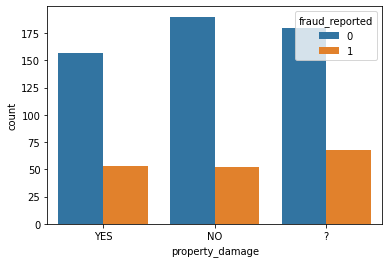

In [22]:
sns.countplot(X_train['property_damage'], hue=y_train)

Untuk semua variabel yang berisi nilai Null kami isi nilai Null tersebut dengan nilai terbanyak pada variabel masing2 tersebut (mode), kecuali property_damage karena kemungkinan setiap kecelakaan terdapat kerusakan maka di isi dengan "YES"

In [23]:
X_train['collision_type'].replace("?", X_train['collision_type'].mode()[0], inplace=True)
X_train['authorities_contacted'].replace("None", X_train['authorities_contacted'].mode()[0], inplace=True)
X_train['property_damage'].replace("?", "YES", inplace=True)
X_train['police_report_available'].replace("?", X_train['police_report_available'].mode()[0], inplace=True)

Cek ulang kembali

In [24]:
for col_name_cat in fraud_data_cat:
  print(X_train[col_name_cat].value_counts())

OH    244
IL    235
IN    221
Name: policy_state, dtype: int64
100/300     250
250/500     237
500/1000    213
Name: policy_csl, dtype: int64
FEMALE    375
MALE      325
Name: insured_sex, dtype: int64
High School    114
JD             111
Associate      107
Masters        106
MD              94
PhD             91
College         77
Name: insured_education_level, dtype: int64
machine-op-inspct    61
prof-specialty       59
exec-managerial      58
tech-support         57
priv-house-serv      55
sales                53
other-service        50
armed-forces         49
craft-repair         48
transport-moving     48
farming-fishing      43
protective-serv      42
adm-clerical         41
handlers-cleaners    36
Name: insured_occupation, dtype: int64
reading           46
bungie-jumping    42
exercise          41
kayaking          40
movies            40
base-jumping      39
yachting          38
golf              38
paintball         37
video-games       36
chess             34
polo           

## EDA

In [25]:
fraud_data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,700.0,2.053586e+02,1.169422e+02,0.00,112.7500,201.500,277.250,478.00
age,700.0,3.900571e+01,9.291341e+00,19.00,32.0000,38.000,45.000,64.00
policy_number,700.0,5.509000e+05,2.569120e+05,100804.00,337022.0000,535430.500,771304.250,999435.00
policy_deductable,700.0,1.131429e+03,6.132870e+02,500.00,500.0000,1000.000,2000.000,2000.00
policy_annual_premium,700.0,1.258413e+03,2.444684e+02,433.33,1089.6075,1265.355,1422.755,2047.59
umbrella_limit,700.0,1.145714e+06,2.330103e+06,-1000000.00,0.0000,0.000,0.000,10000000.00
insured_zip,700.0,4.994067e+05,7.079669e+04,430232.00,448658.0000,466149.000,602292.750,620962.00
capital-gains,700.0,2.533157e+04,2.810445e+04,0.00,0.0000,0.000,51000.000,100500.00
capital-loss,700.0,-2.656757e+04,2.793390e+04,-93600.00,-51025.0000,-23250.000,0.000,0.00
incident_hour_of_the_day,700.0,1.149000e+01,6.953857e+00,0.00,6.0000,12.000,17.000,23.00


In [26]:
fraud_data_cat.describe().T

,count,unique,top,freq
policy_state,700,3,OH,244
policy_csl,700,3,100/300,250
insured_sex,700,2,FEMALE,375
insured_education_level,700,7,High School,114
insured_occupation,700,14,machine-op-inspct,61
insured_hobbies,700,20,reading,46
insured_relationship,700,6,own-child,133
incident_type,700,4,Single Vehicle Collision,286
collision_type,700,4,Rear Collision,196
incident_severity,700,4,Minor Damage,263


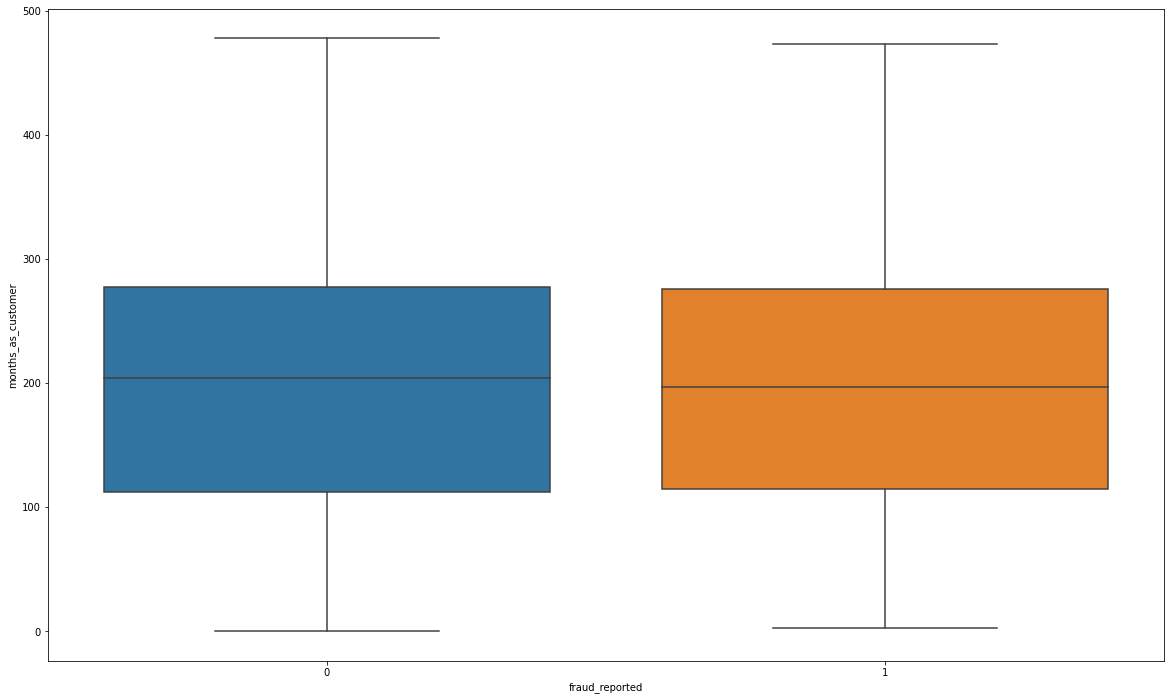

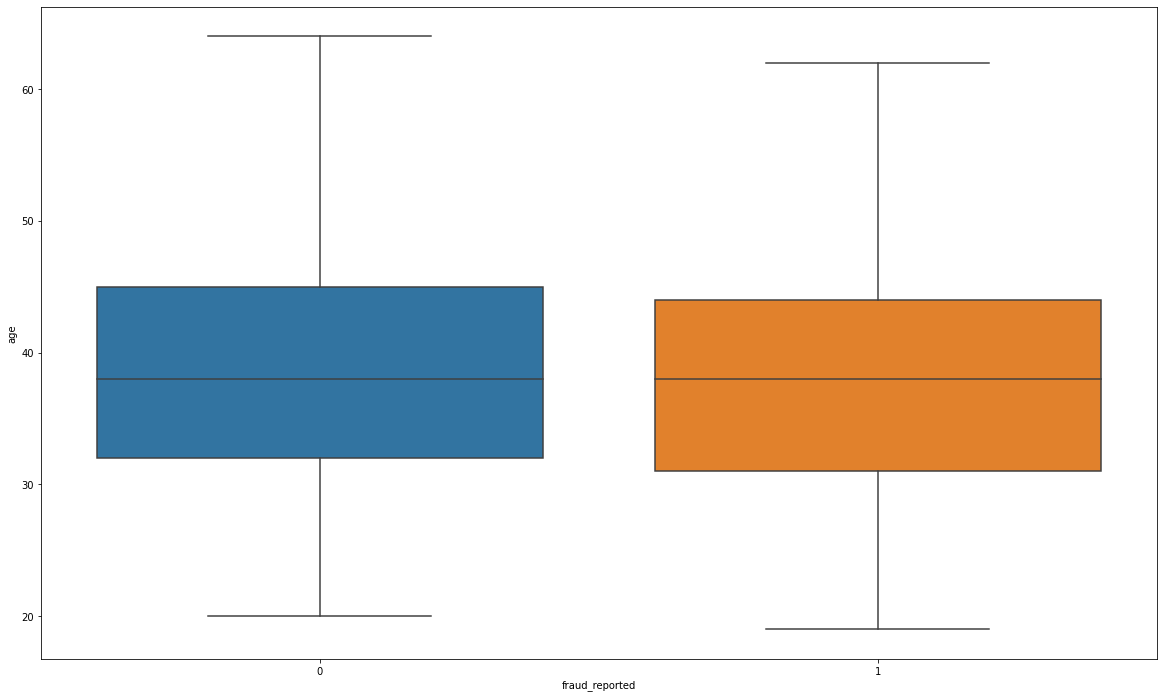

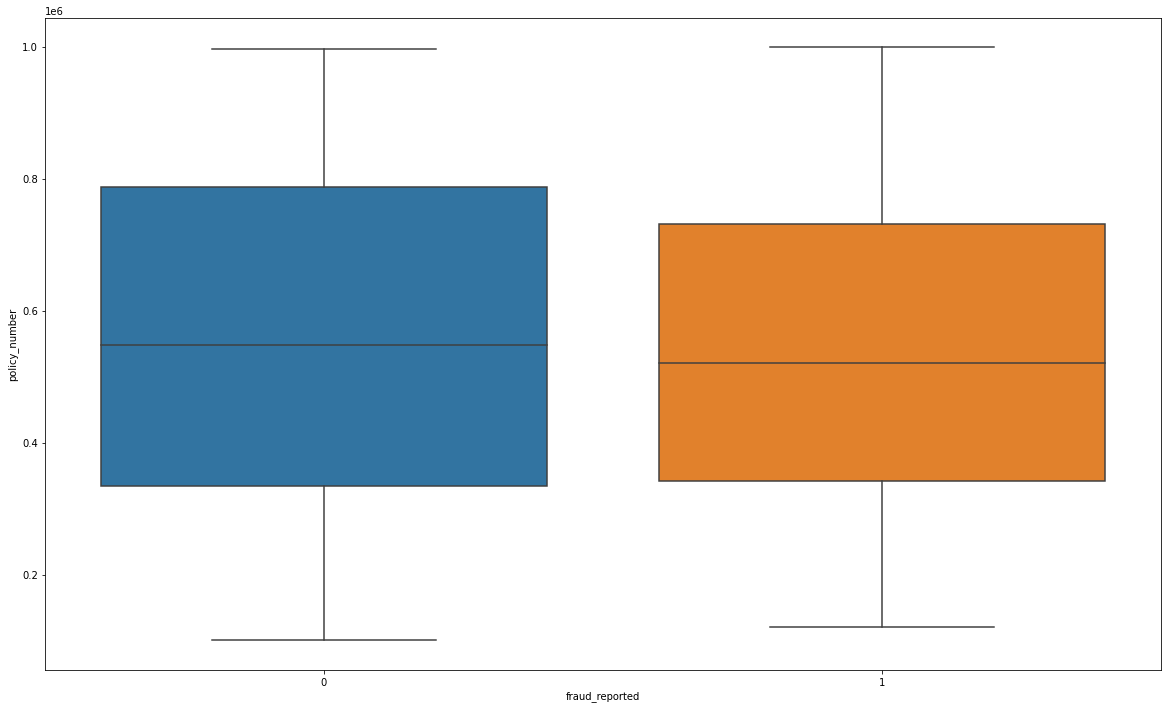

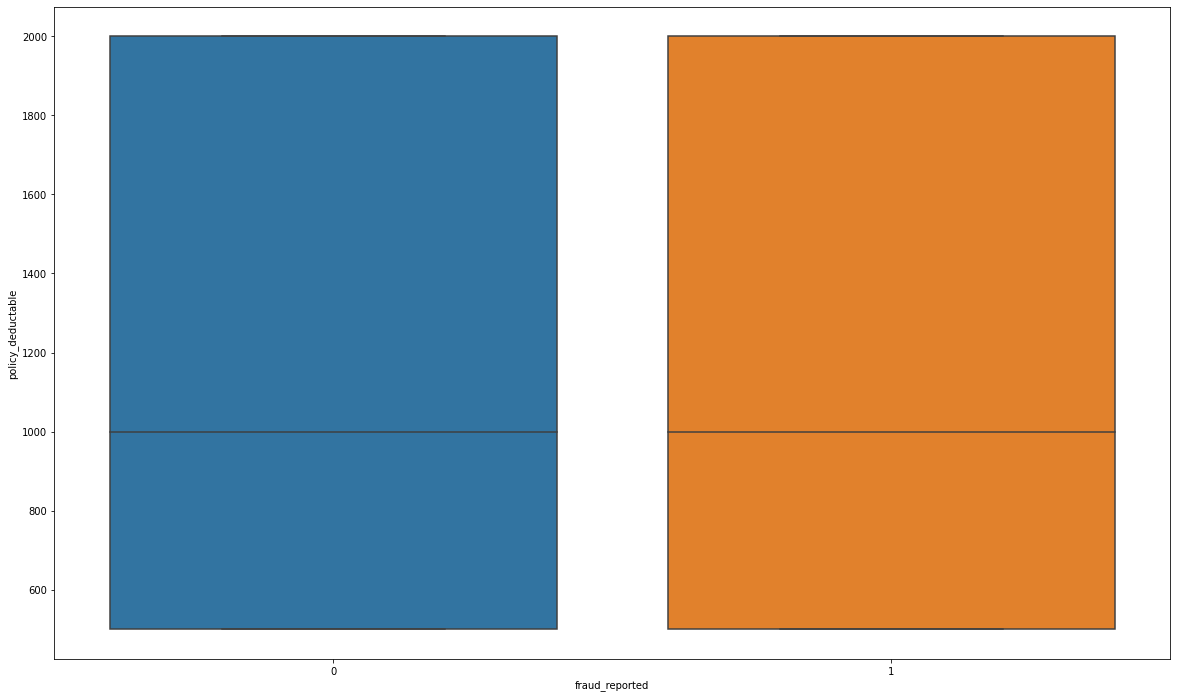

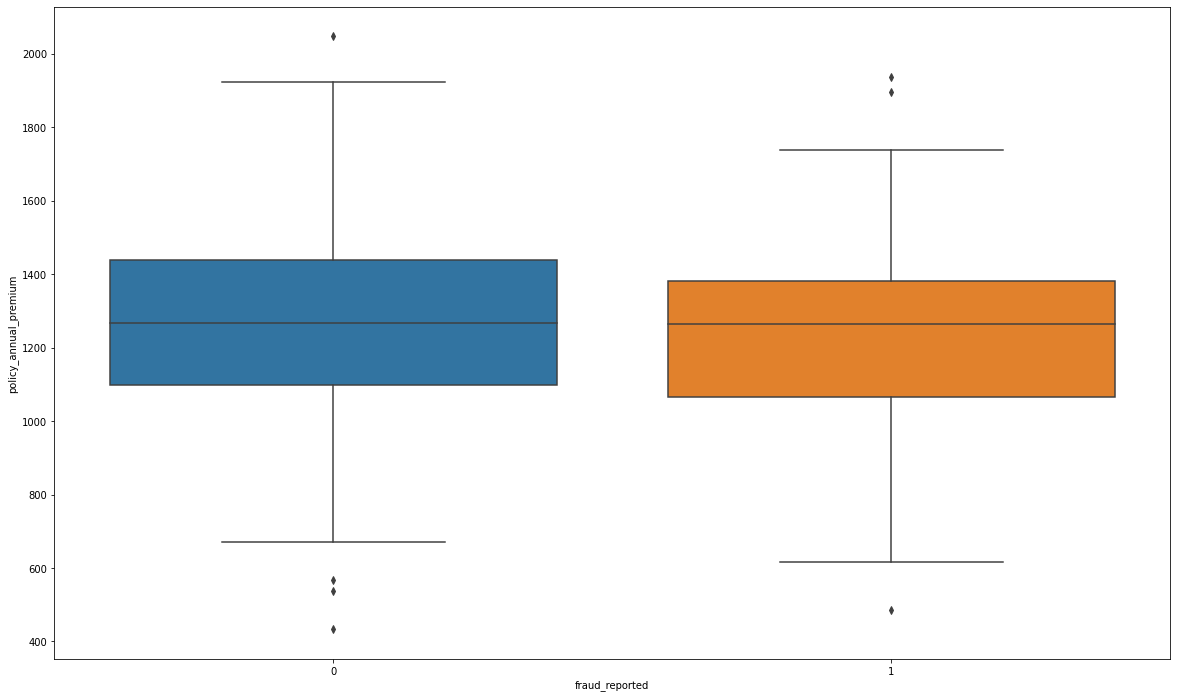

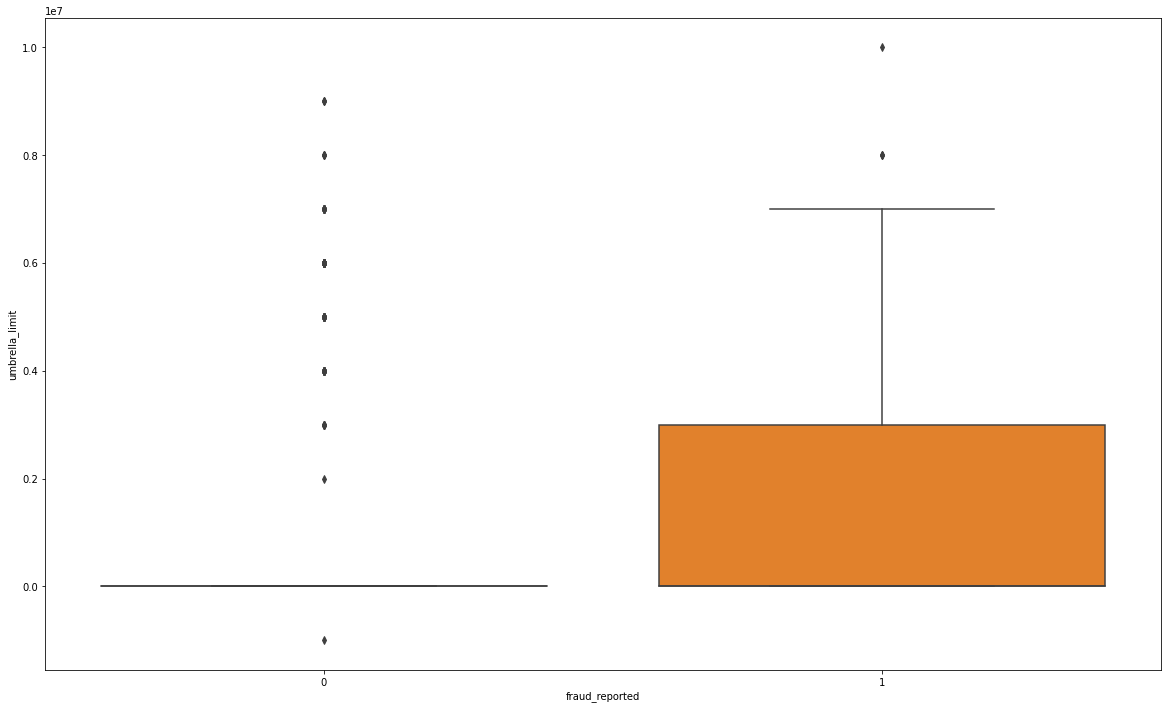

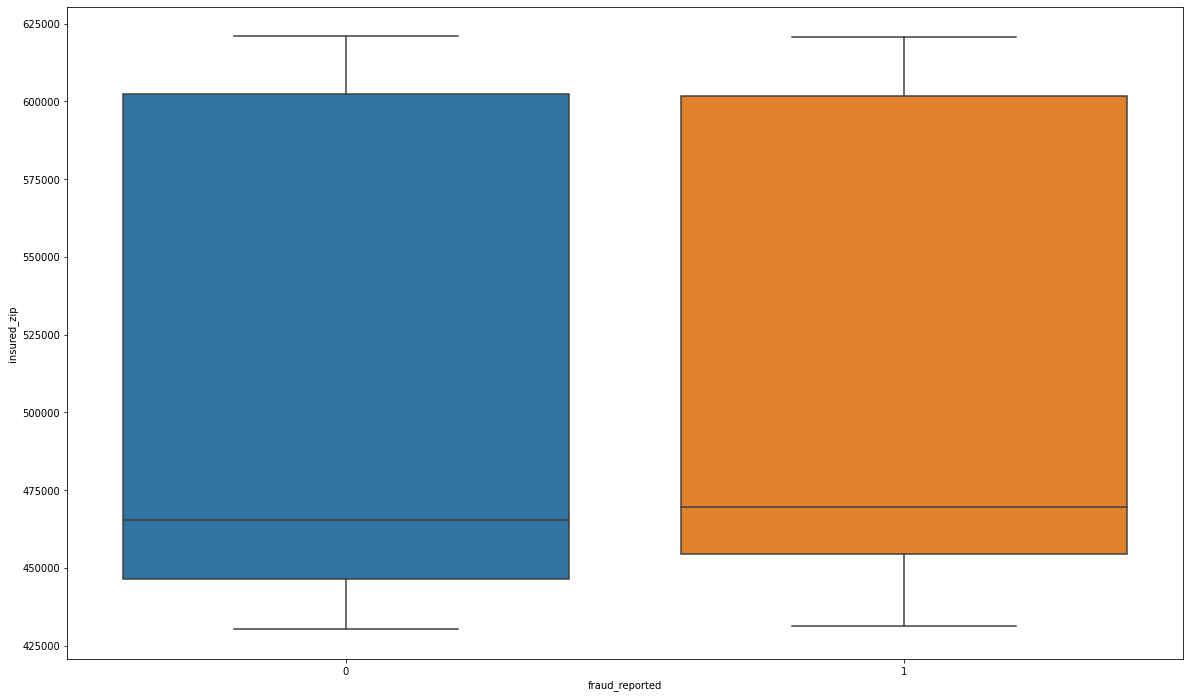

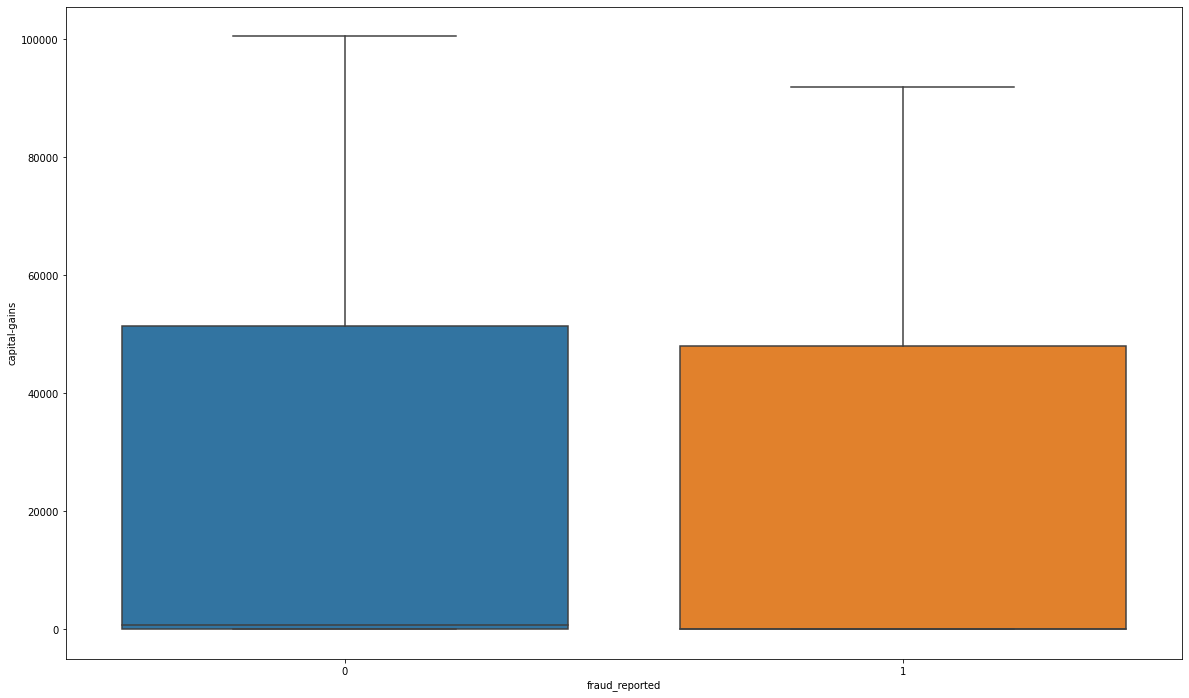

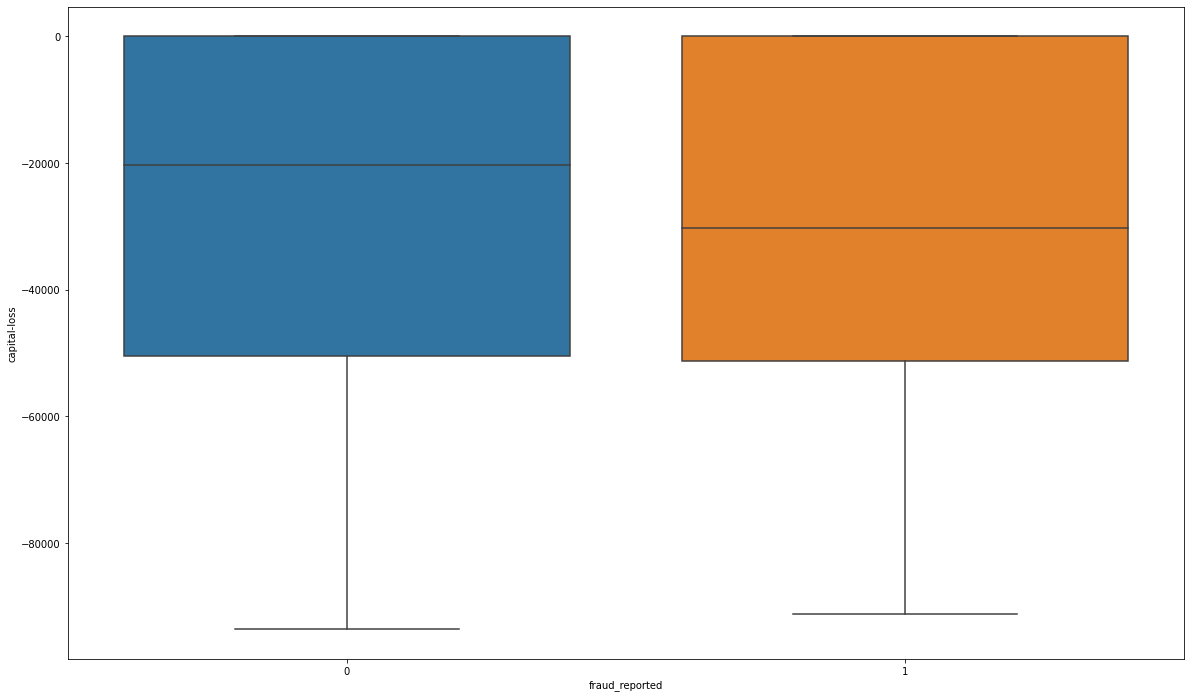

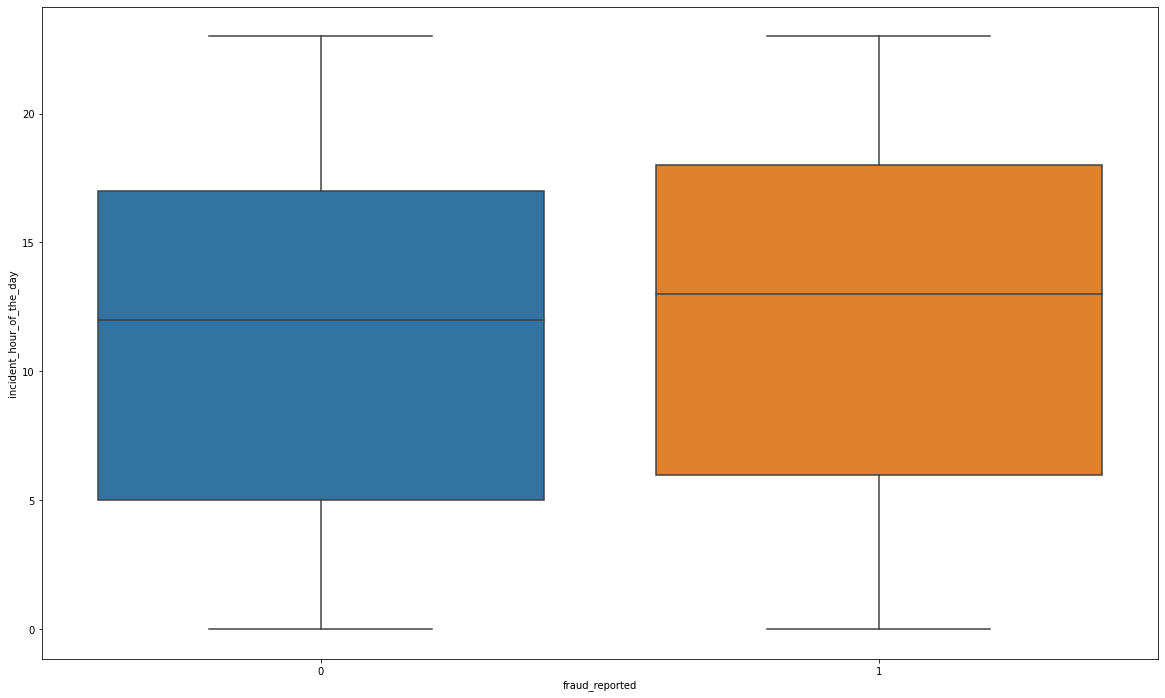

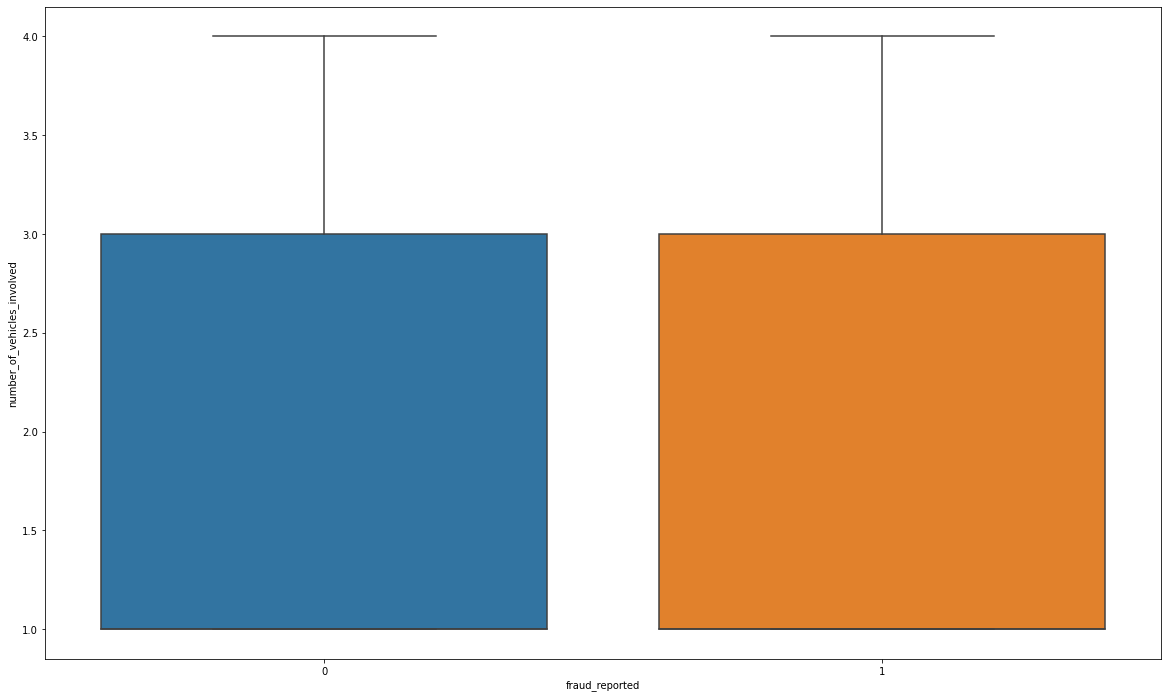

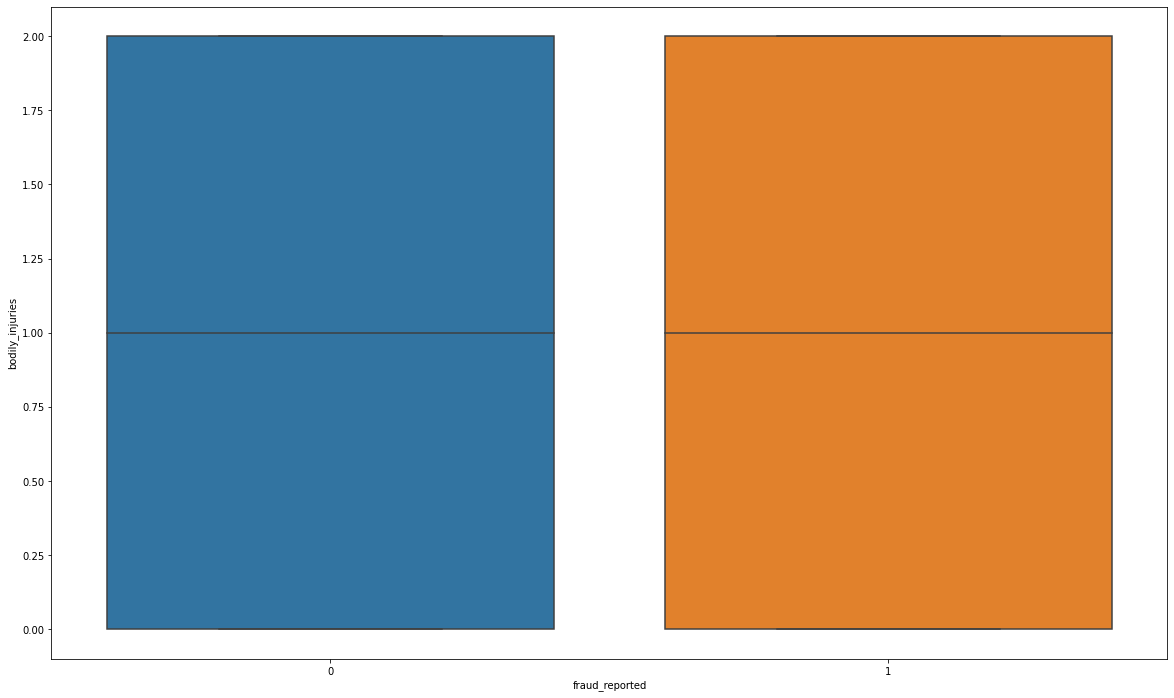

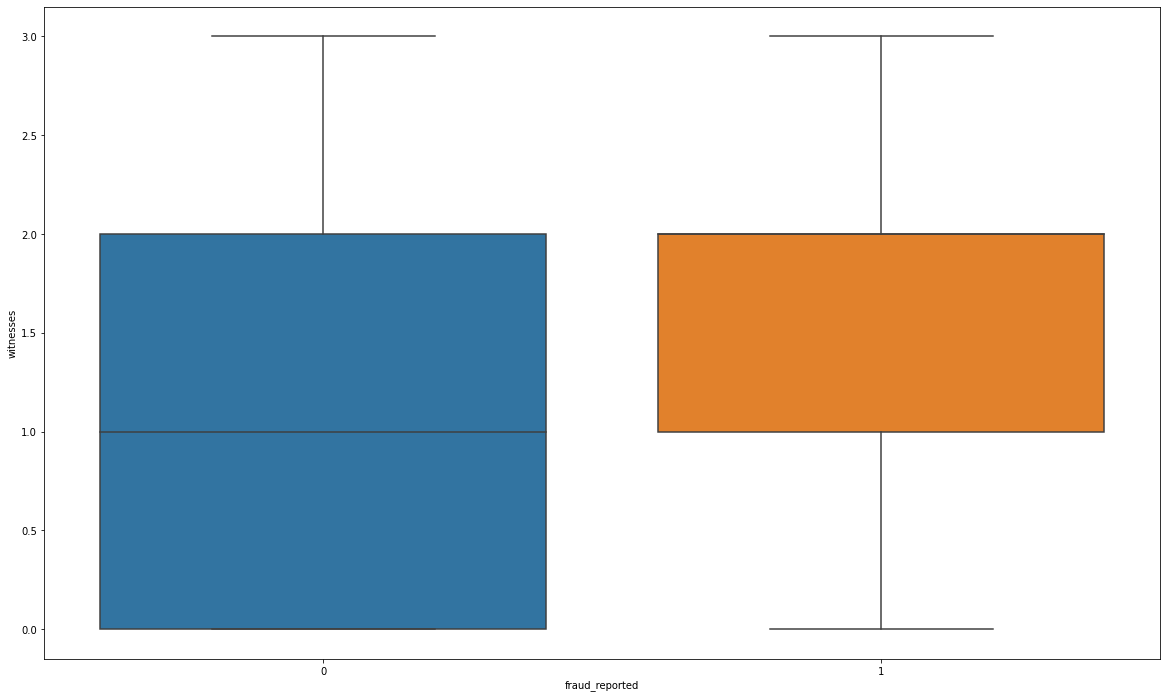

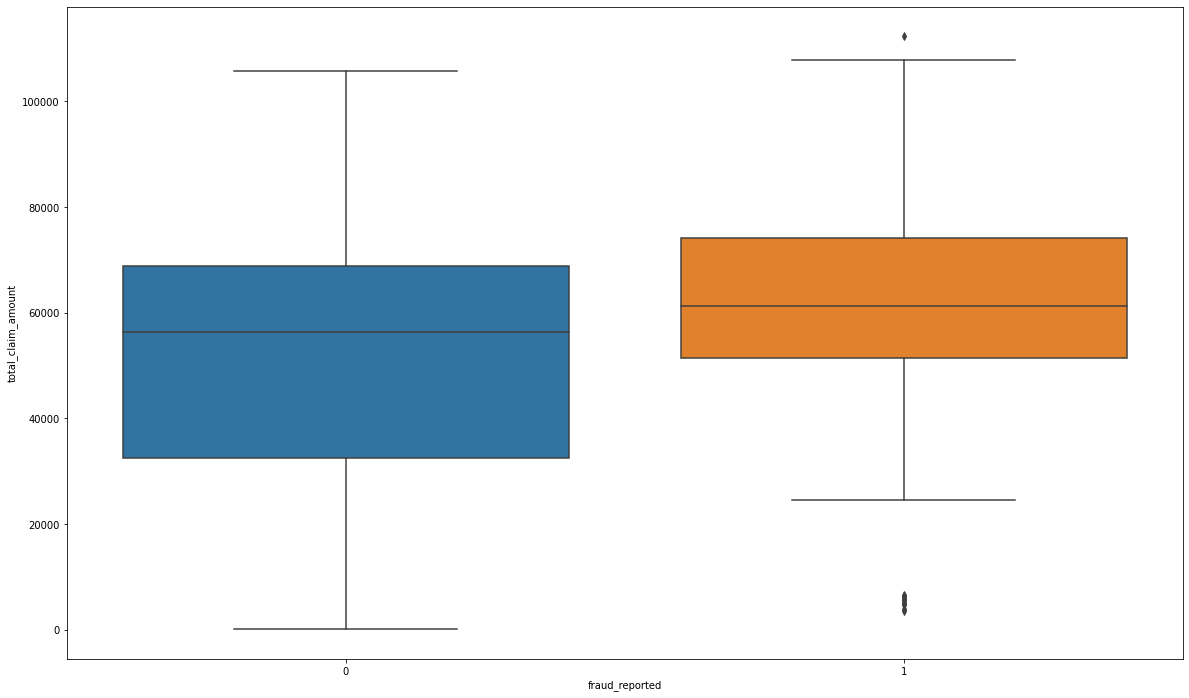

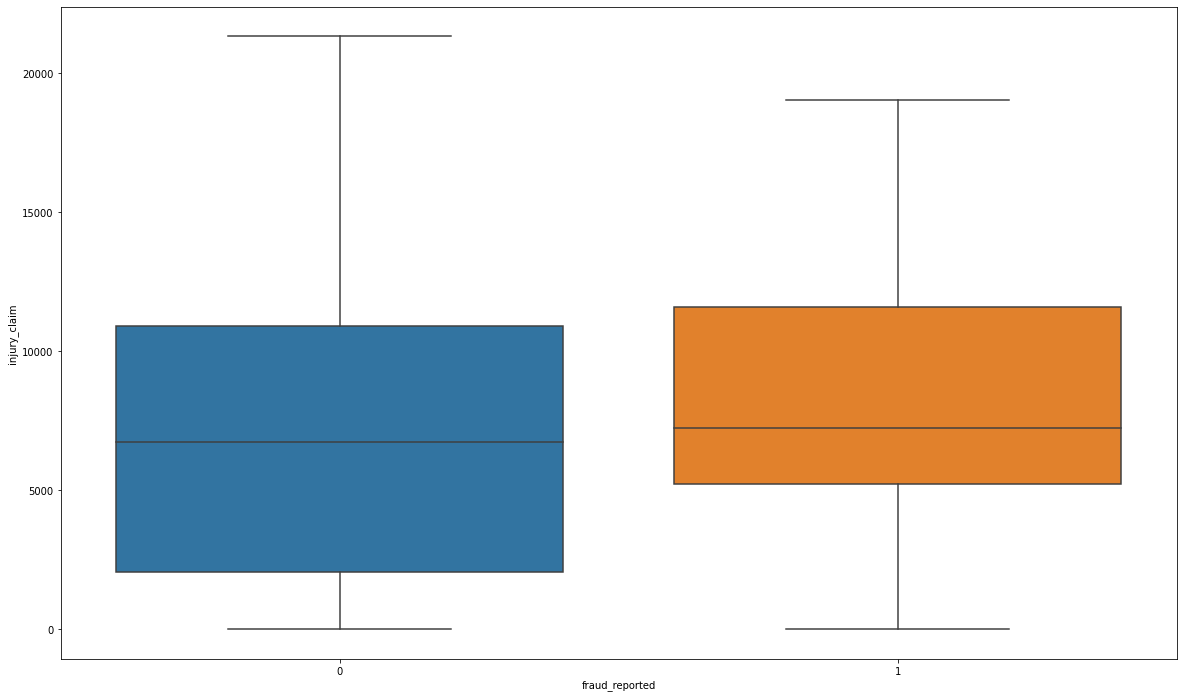

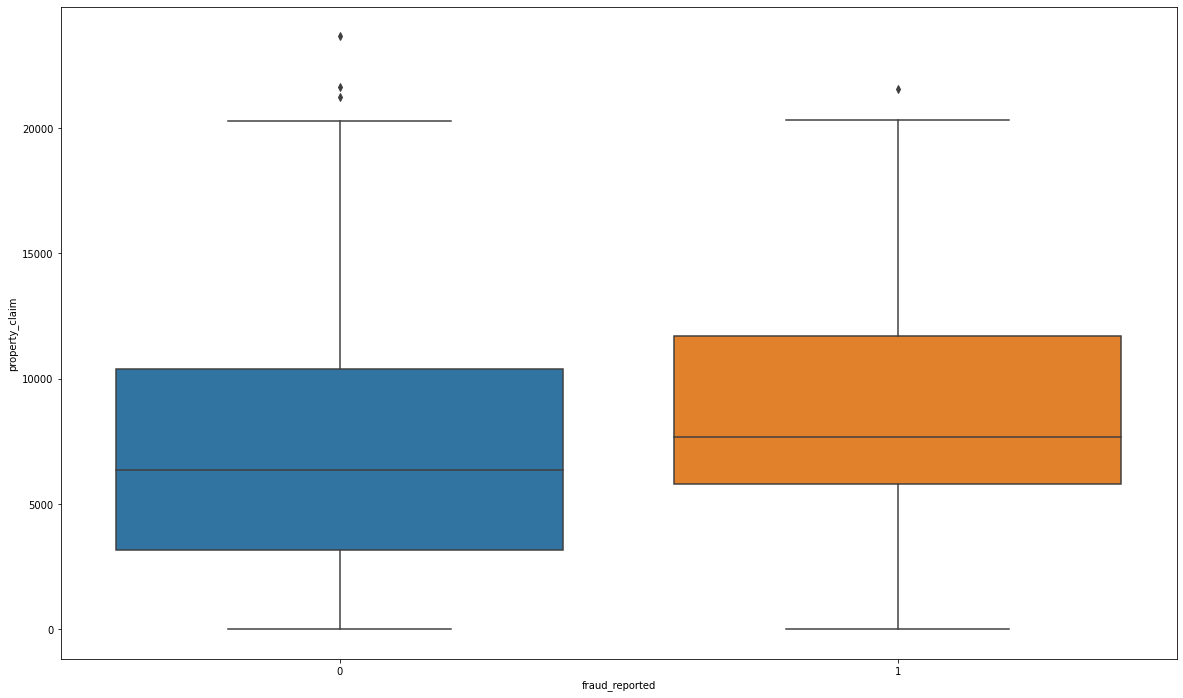

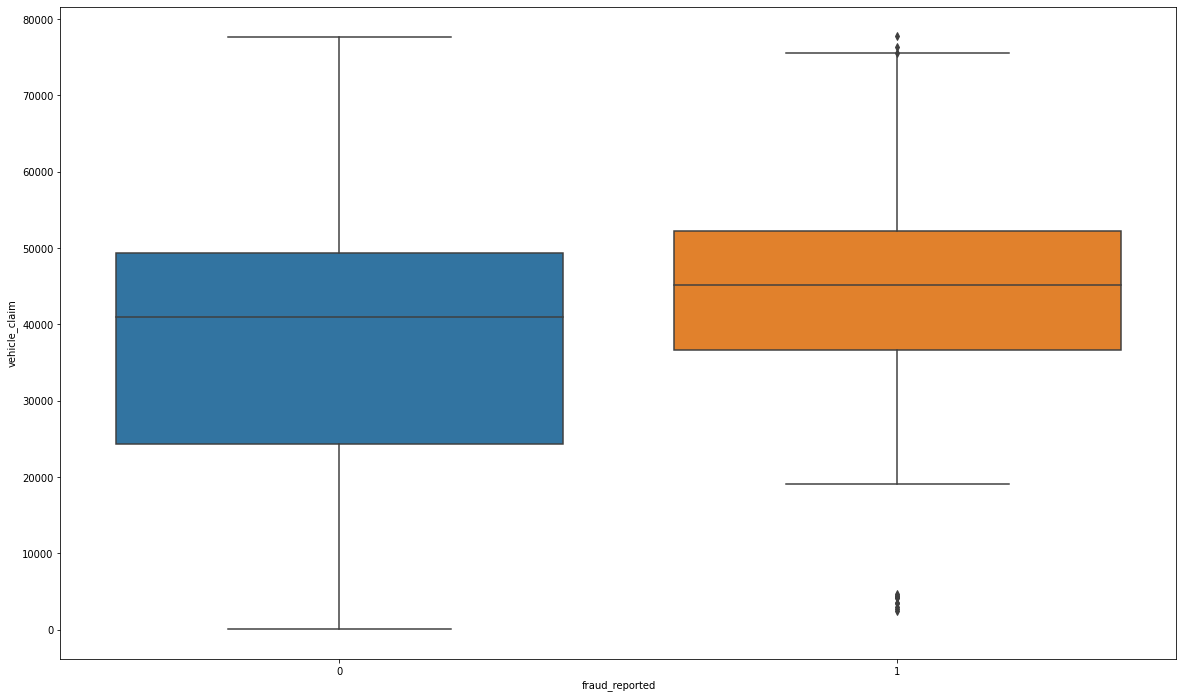

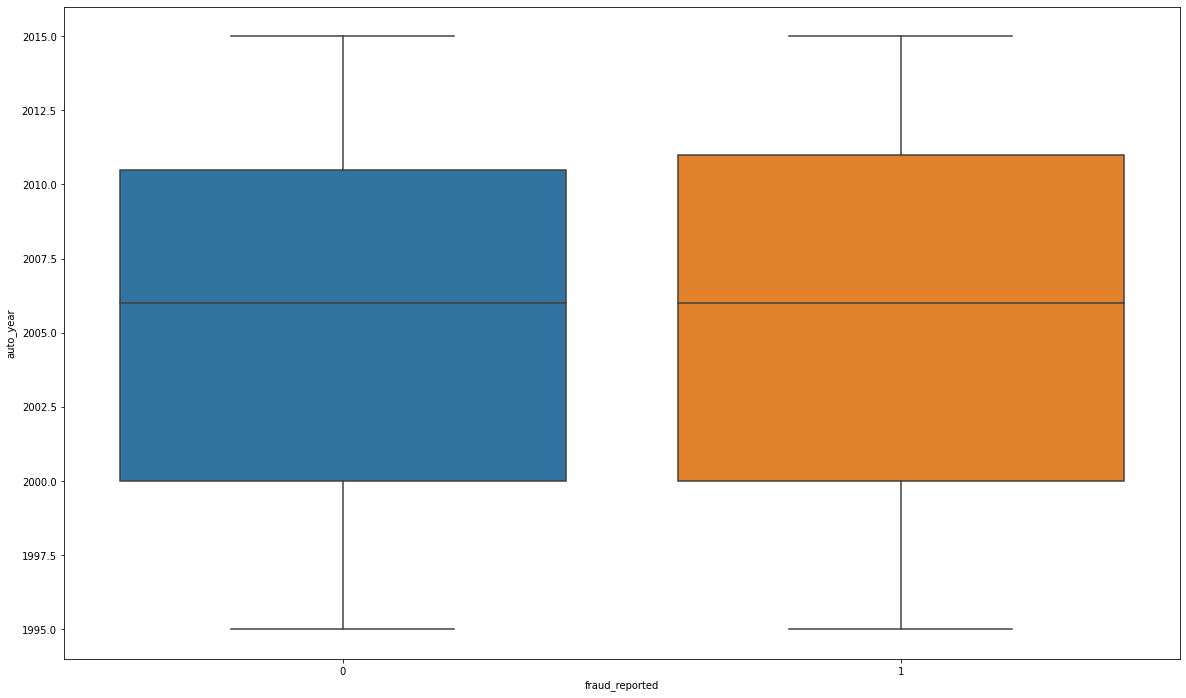

In [27]:
for col_name in fraud_data_num:
  plt.figure(figsize=(20,12))
  sns.boxplot(y=col_name, x=y_train, data=X_train)

berdasarkan perbedaan boxplot median pada masing masing variabel terhadap target dalam data numeric, maka kami memilih variabel
- policy_annual_premium
- capital-gains
- capital-loss
- witnesses
- total_claim_amount
- injury_claim
- property_claim
- vehicle_claim
- auto_year

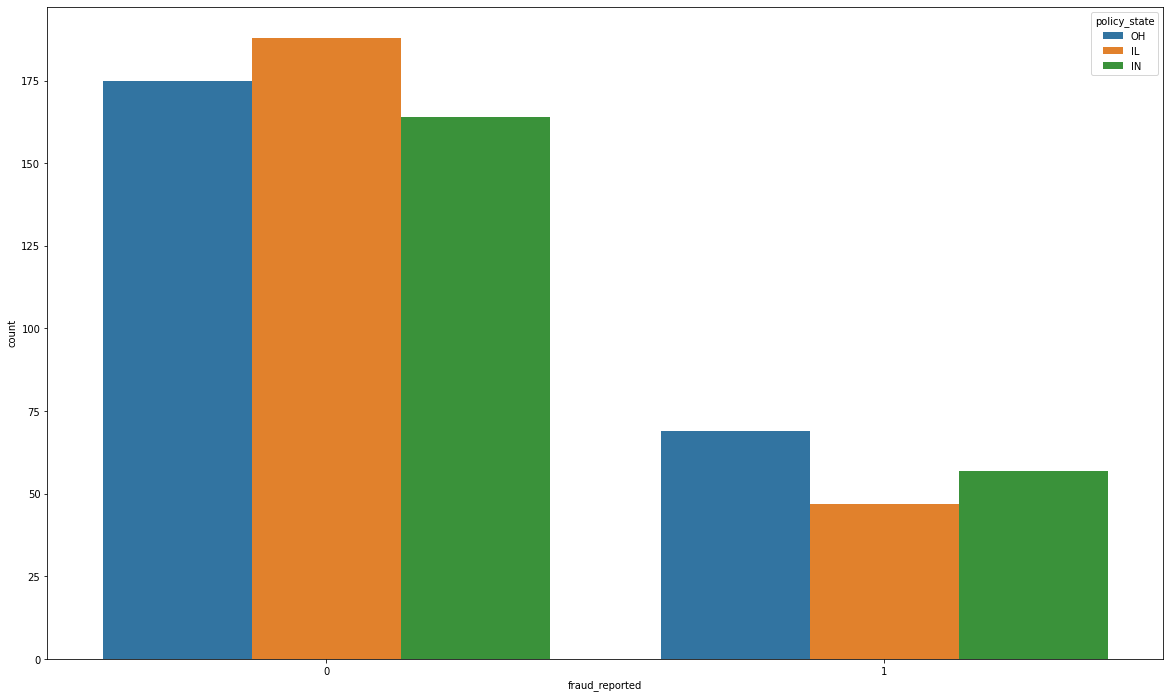

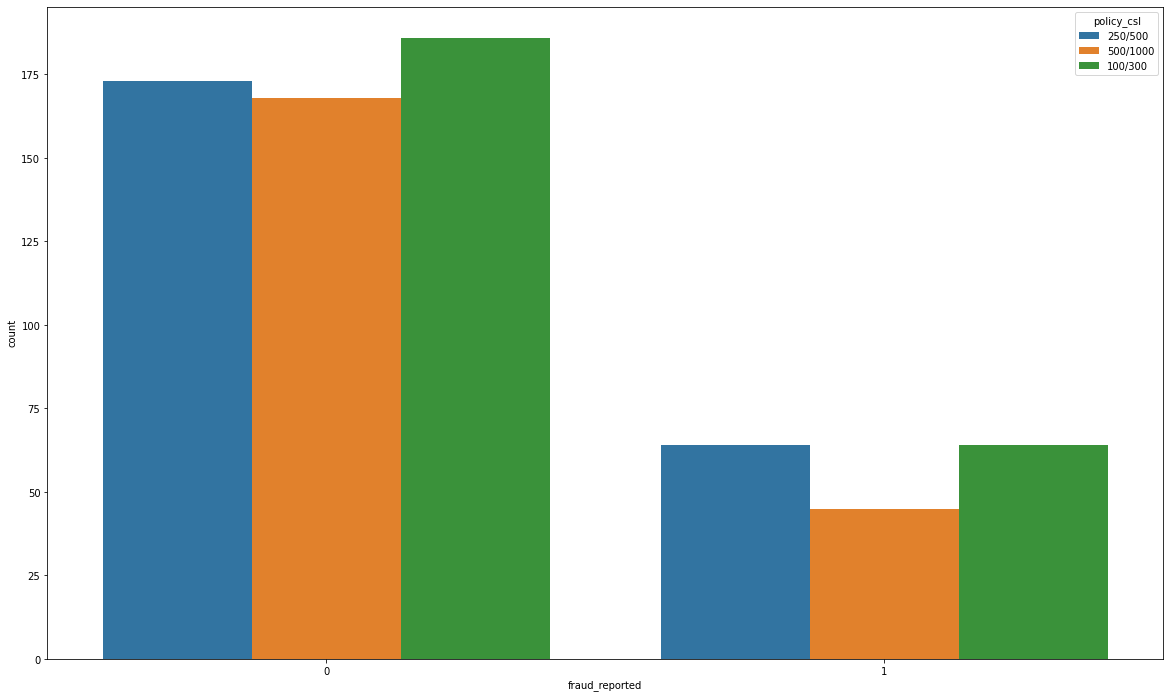

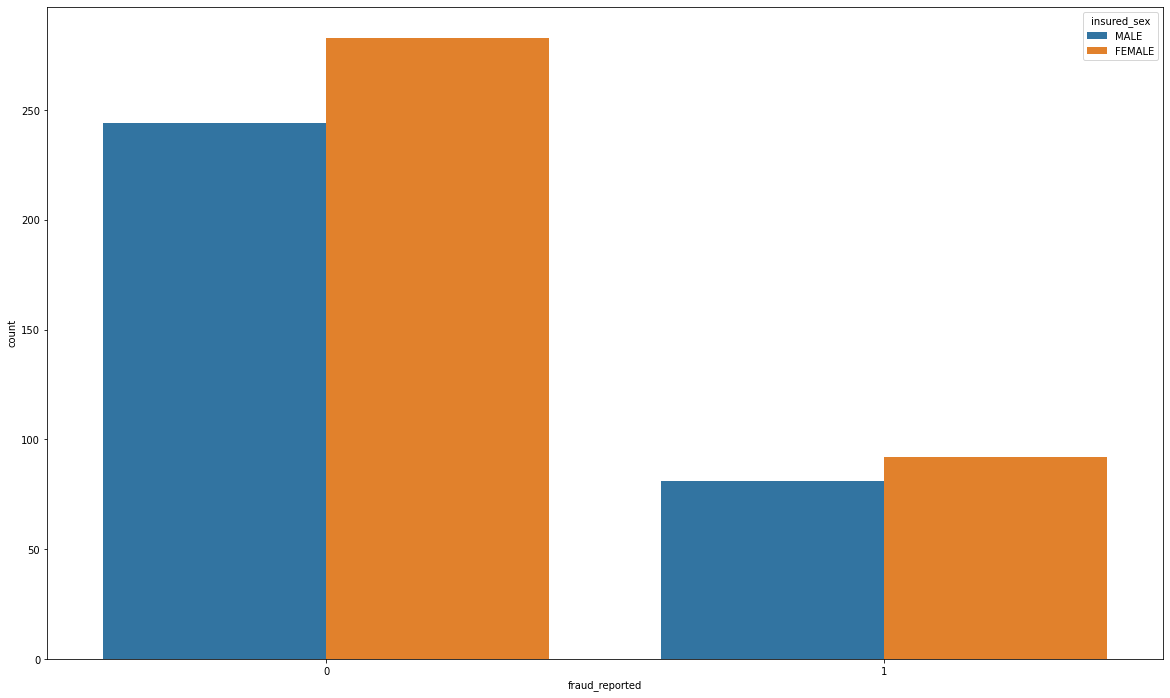

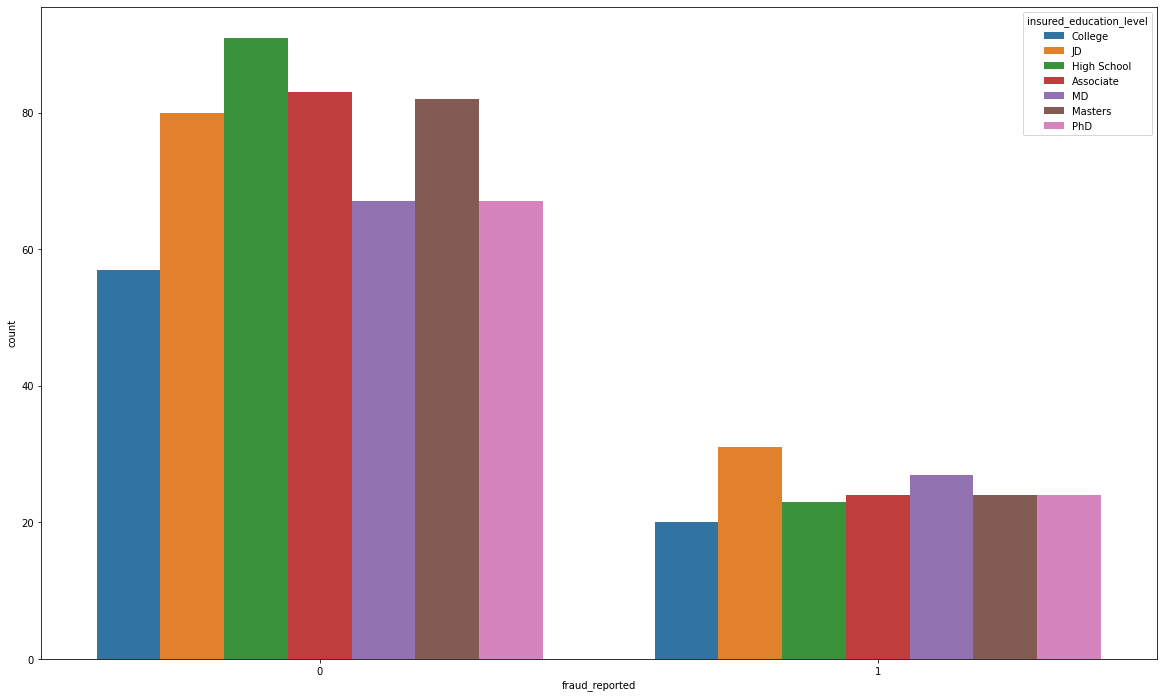

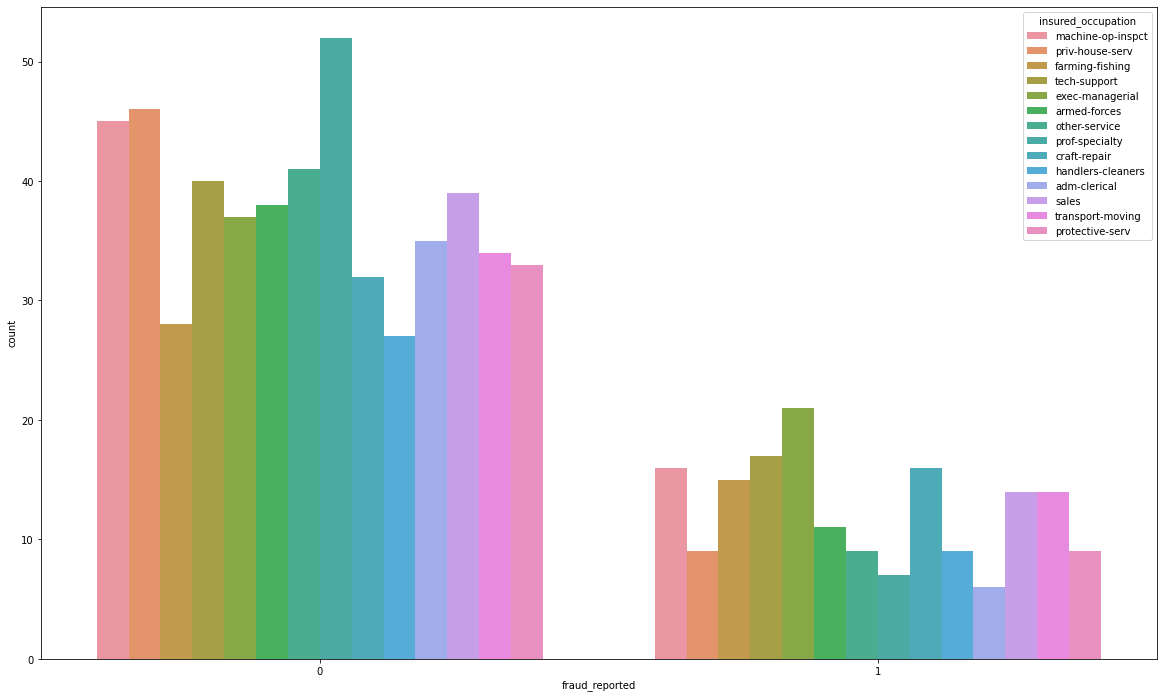

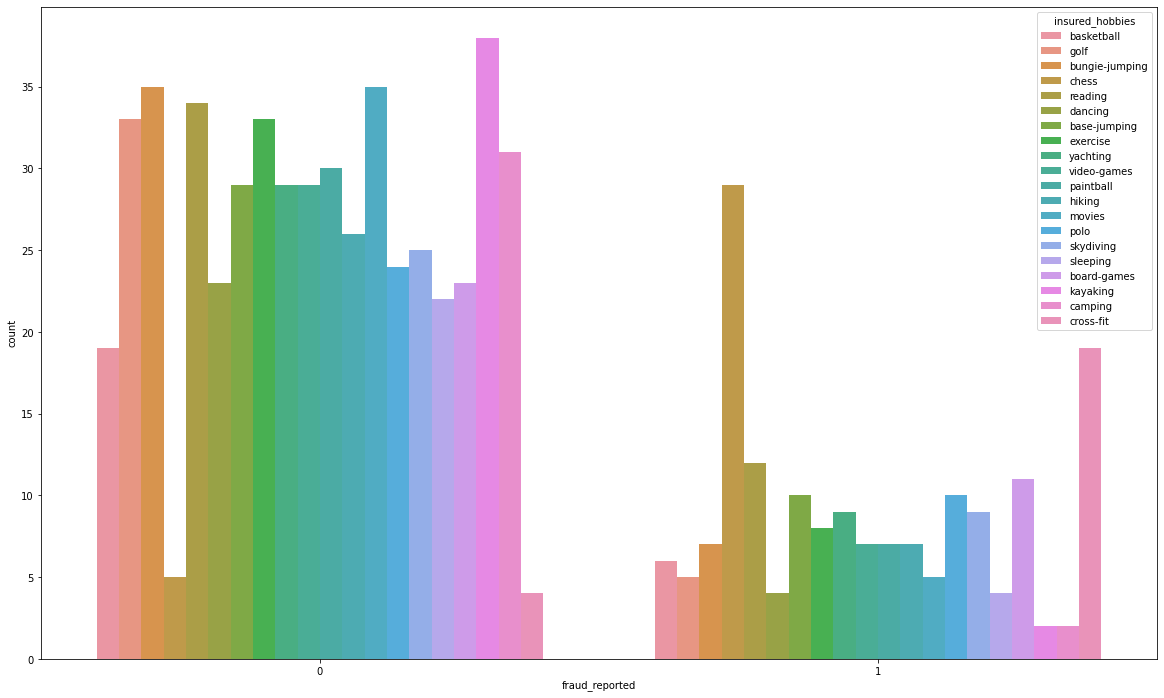

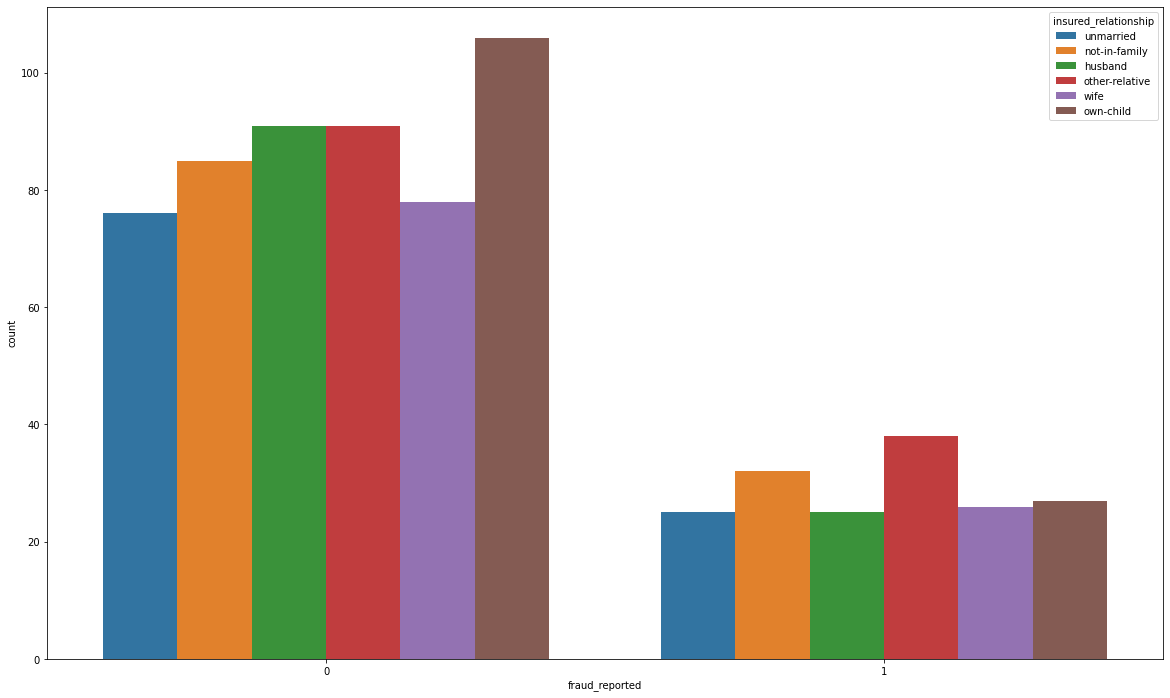

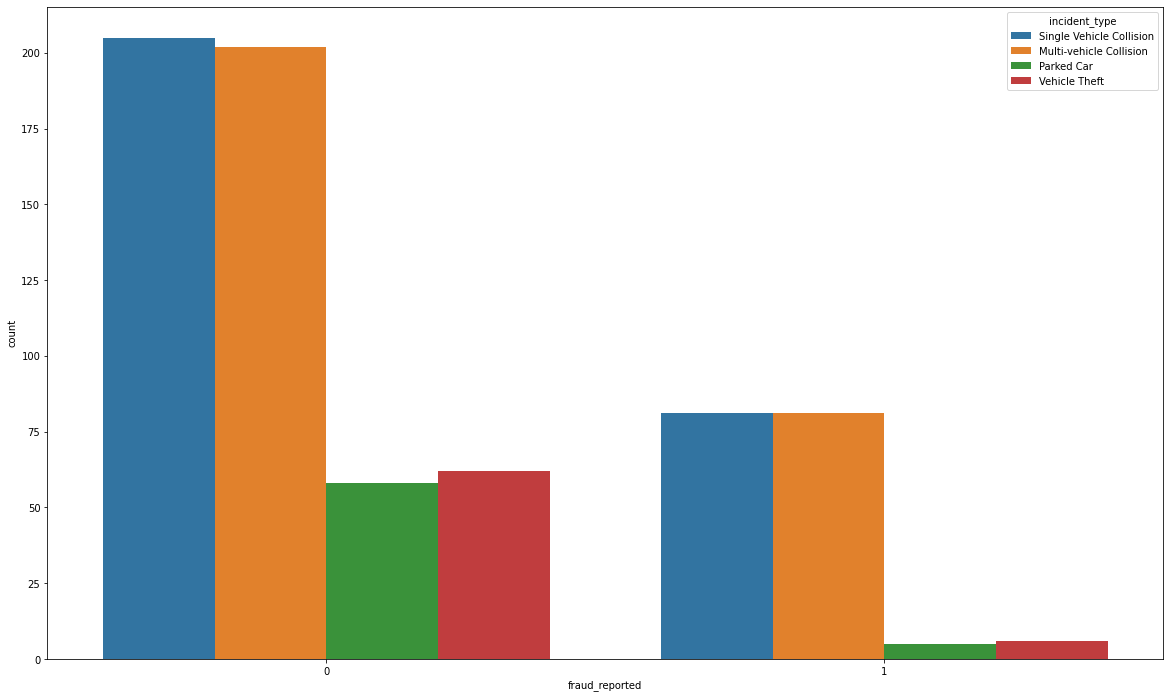

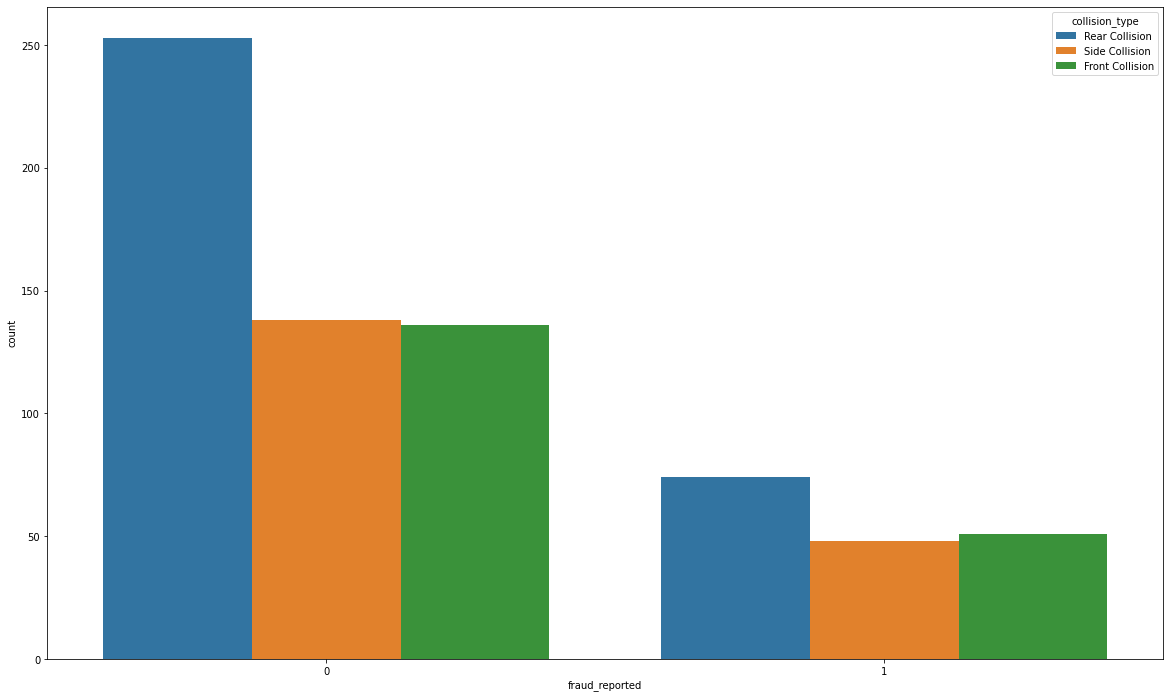

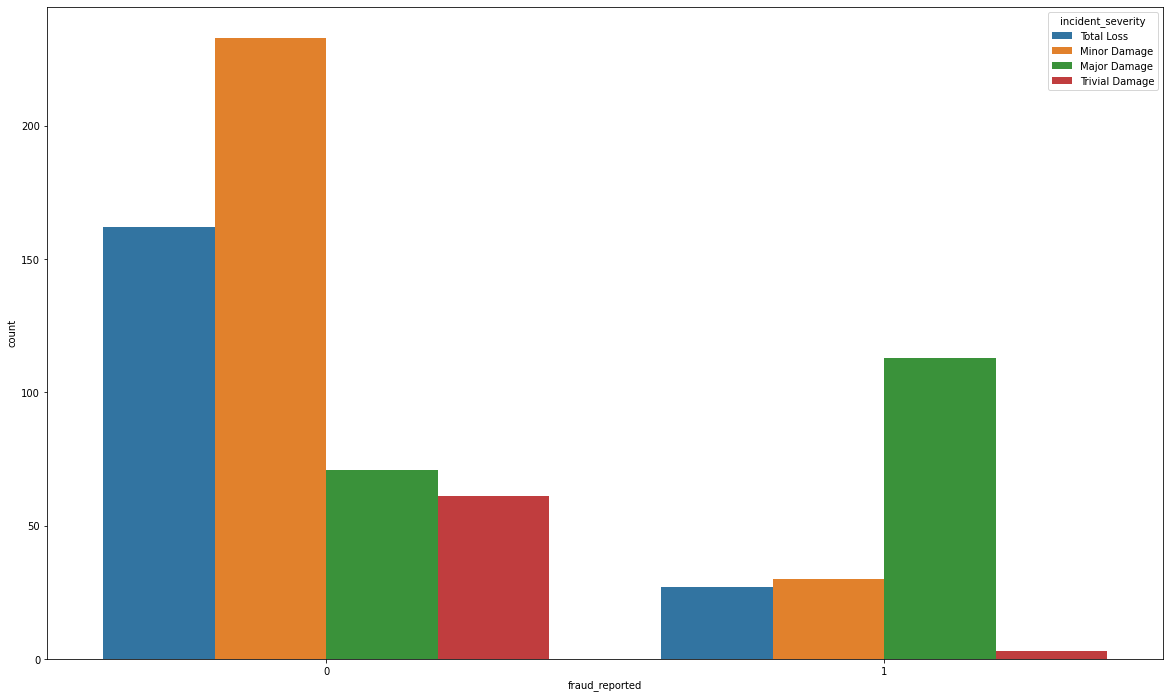

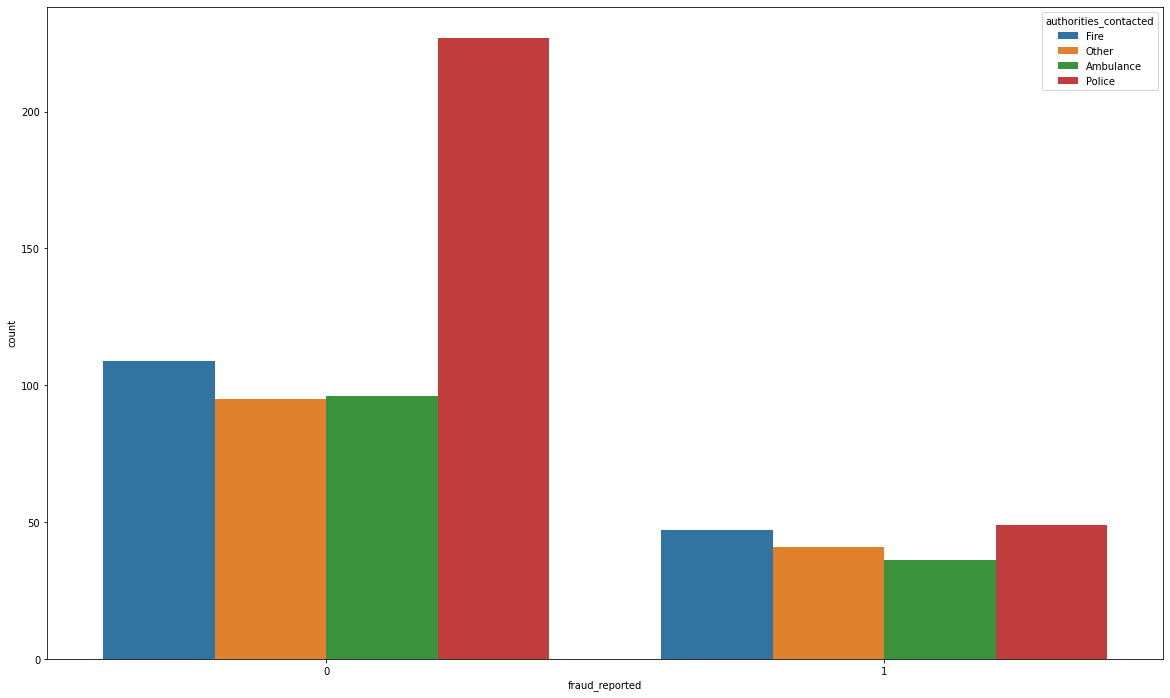

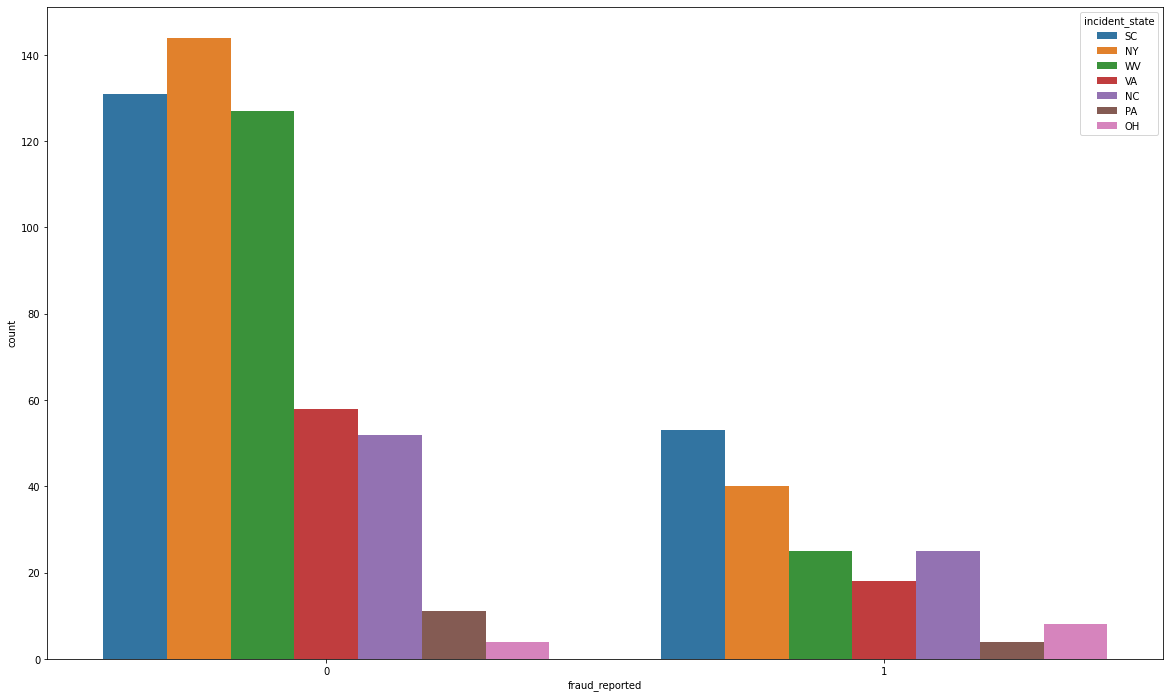

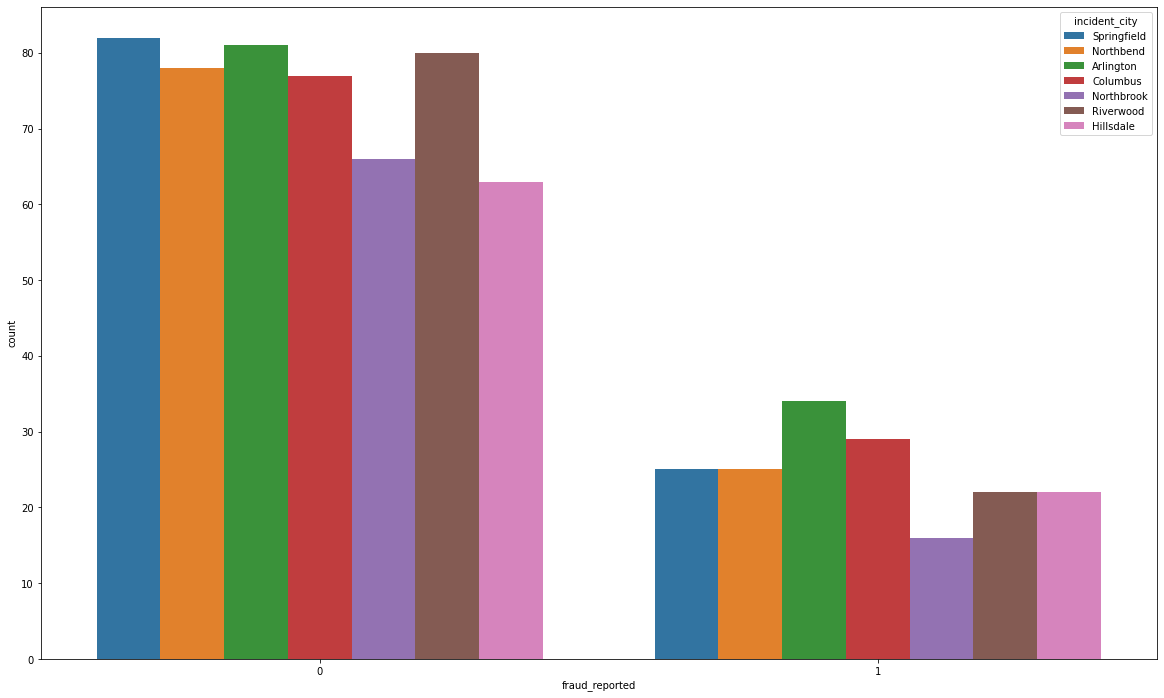

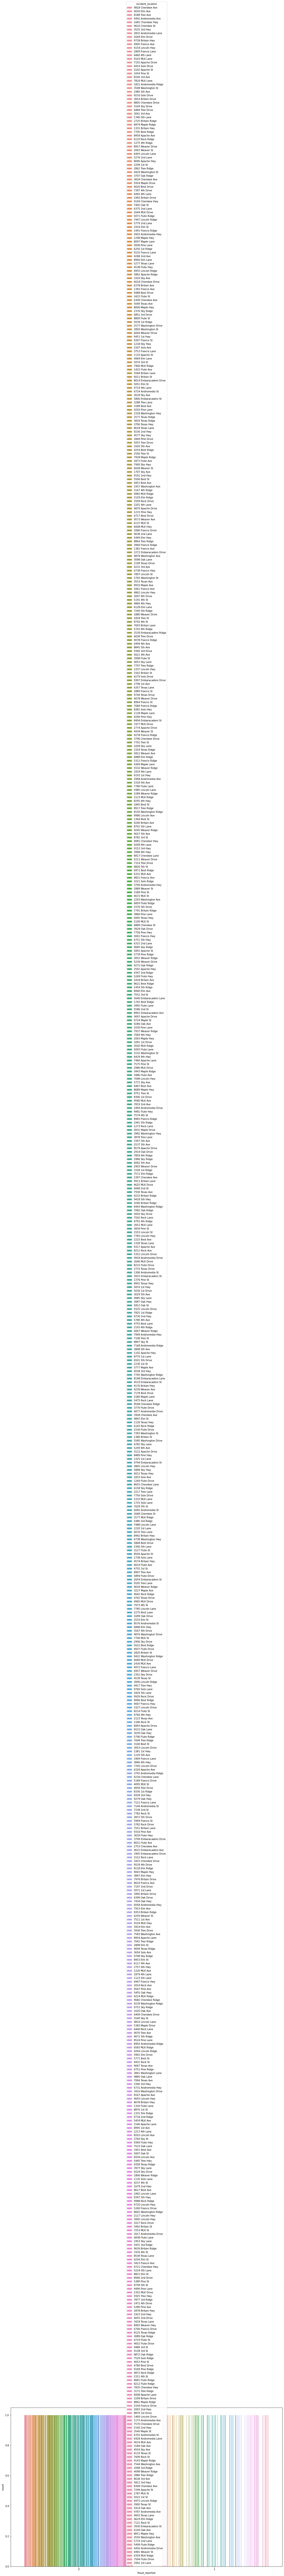

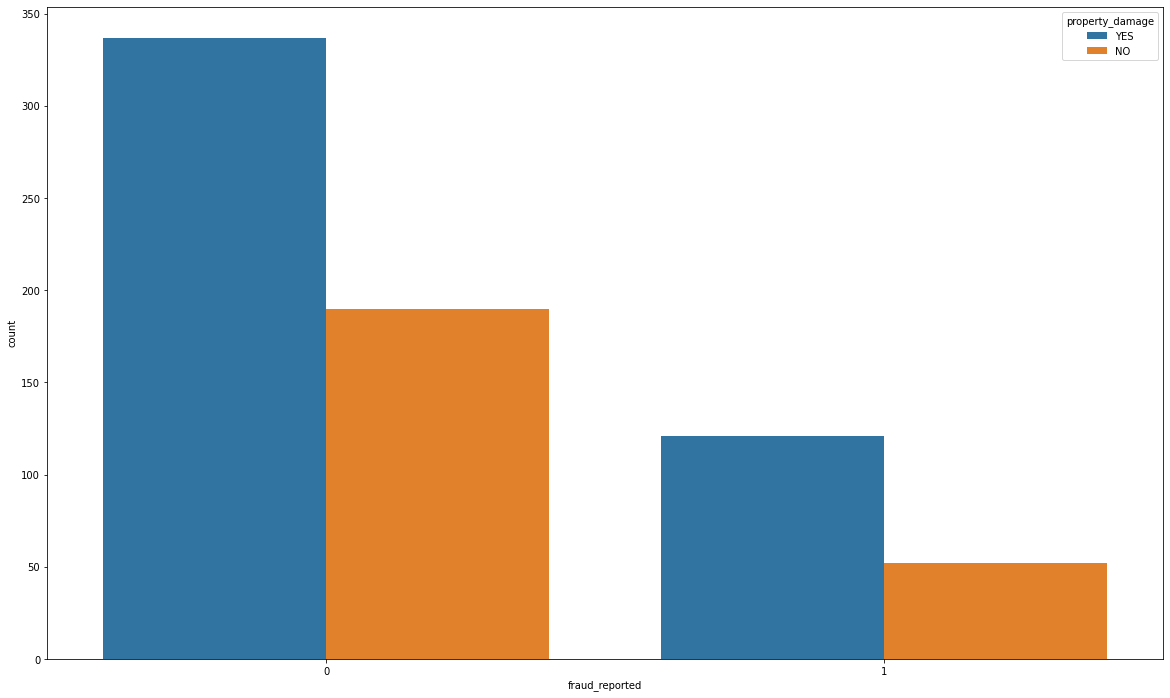

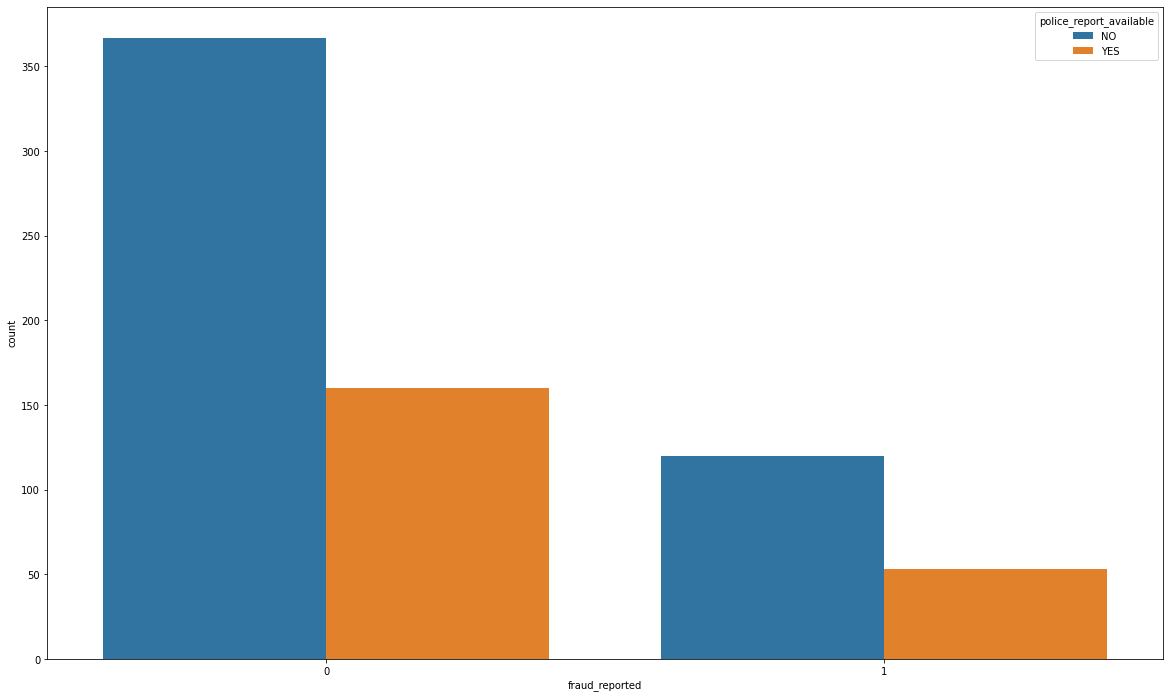

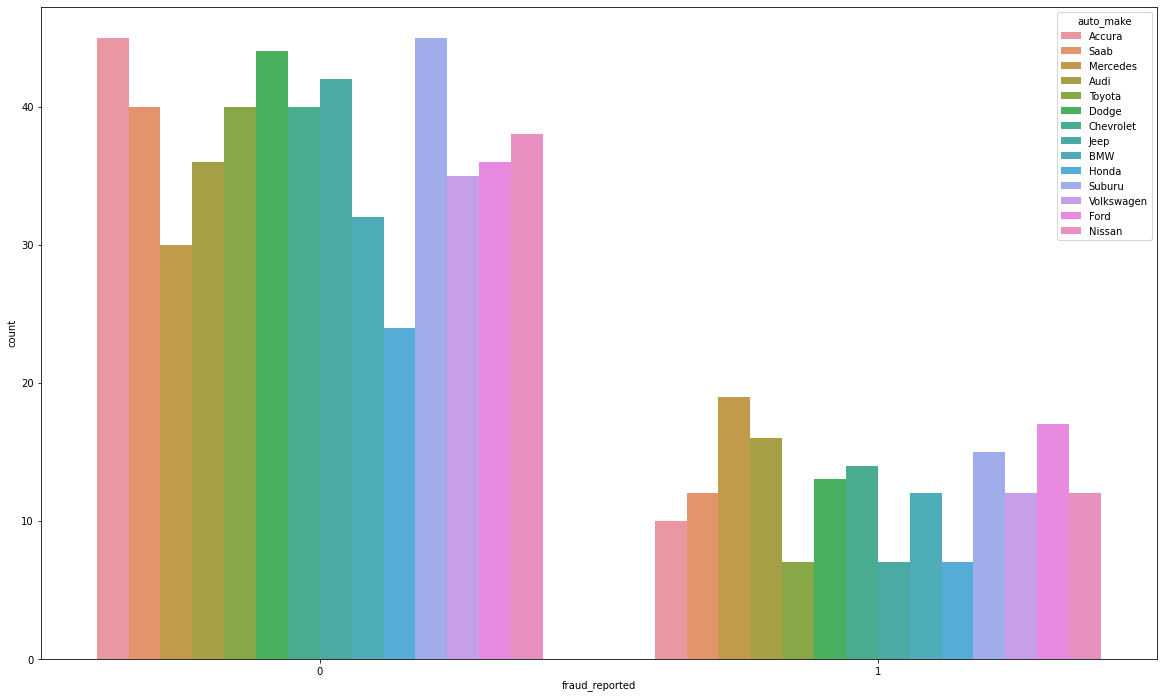

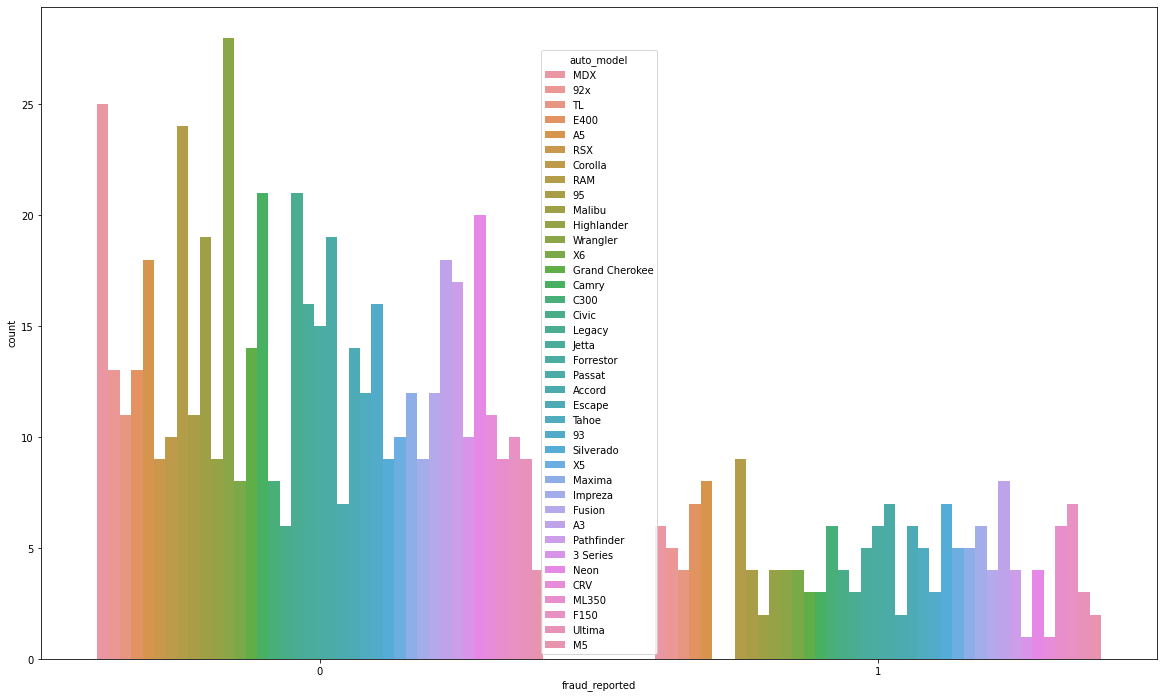

In [28]:
for col_name in fraud_data_cat:
  plt.figure(figsize=(20,12))
  sns.countplot(hue=col_name, x=y_train, data=X_train)

pemilihan pada data cat, kami memilih berdasarkan 
perbedaan distribusi maka kami memilih :
- policy_state
- policy_csi
- insured_education_level

## Feature Selection

In [29]:
fraud_data_cat_X = X_train[fraud_data_cat.columns.to_list()].drop('incident_location', axis=1)

In [30]:
df_cat = pd.get_dummies(fraud_data_cat_X)

In [31]:
# Selanjutnya memilih fitur kategorikal yang penting berdasarkan nilai chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
# Applying kbest algo
ordered_rank_features = SelectKBest(score_func=chi2, k=14)
ordered_feature = ordered_rank_features.fit(df_cat,y_train.values)
ordered_feature.scores_

array([2.80697810e+00, 1.37918399e-01, 1.66610644e+00, 1.05406324e-01,
       6.67933957e-01, 1.47336000e+00, 6.59932069e-03, 7.61460080e-03,
       3.00095528e-01, 6.56737938e-02, 1.26222077e+00, 6.16108765e-01,
       8.12016792e-01, 2.44765435e-01, 1.34664110e-01, 2.23901134e+00,
       1.35141657e-01, 1.91645735e+00, 4.11722648e+00, 2.39001973e+00,
       1.57944961e-03, 7.52700159e-02, 1.21145978e+00, 2.06130638e+00,
       5.23587712e+00, 2.43695912e-01, 8.23997949e-02, 8.00023746e-01,
       5.11405308e-01, 1.80019569e-02, 6.85525002e-03, 1.06623301e+00,
       1.46191954e+00, 6.17138059e+00, 6.70616766e+01, 4.14324354e+01,
       1.42209003e+00, 5.96319540e-01, 2.72751666e+00, 2.17533619e-01,
       8.35528841e+00, 3.20726986e+00, 6.67886926e-01, 4.03225484e-01,
       4.65832719e-02, 5.63659626e-02, 1.21631288e+00, 5.37324856e-01,
       2.16700948e-02, 6.23555812e-01, 4.36981151e-01, 1.55973106e+00,
       1.39239971e+00, 7.91679567e-05, 4.56285442e-03, 2.32247464e+00,
      

In [33]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])
df_columns = pd.DataFrame(df_cat.columns)
univariate_ranked = pd.concat([df_columns, df_scores],axis=1)
univariate_ranked.columns = ['Features', 'Scores']
univariate_ranked.set_index('Features', inplace = True)

# Ambil 10 fitur paling penting
top_cat = univariate_ranked.sort_values('Scores', ascending = False).head(10)
top_cat

,Scores
Features,
incident_severity_Major Damage,133.186410
insured_hobbies_chess,67.061677
insured_hobbies_cross-fit,41.432435
incident_severity_Minor Damage,25.031349
incident_severity_Trivial Damage,13.795640
incident_state_OH,11.350992
incident_severity_Total Loss,11.047164
incident_type_Parked Car,9.531226
incident_type_Vehicle Theft,9.228634


In [34]:
top_cat.index.to_list()

['incident_severity_Major Damage',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'incident_severity_Minor Damage',
 'incident_severity_Trivial Damage',
 'incident_state_OH',
 'incident_severity_Total Loss',
 'incident_type_Parked Car',
 'incident_type_Vehicle Theft',
 'insured_hobbies_kayaking']

In [35]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(fraud_data_num, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 0.113  0.032  0.22   0.033  2.698  3.519  0.339  0.698  0.434  0.898
  4.579  1.2    0.614 24.585  5.822 22.417 25.932  0.03 ]


In [36]:
df_scores = pd.DataFrame(fit.scores_, columns=['Score'])
df_columns = pd.DataFrame(fraud_data_num.columns)
univariate_ranked = pd.concat([df_columns, df_scores],axis=1)
univariate_ranked.columns = ['Features', 'Scores']
univariate_ranked.set_index('Features', inplace = True)

# Ambil 10 fitur paling penting
top_cat = univariate_ranked.sort_values('Scores', ascending = False).head(10)
top_cat

,Scores
Features,
vehicle_claim,25.931701
total_claim_amount,24.584679
property_claim,22.417007
injury_claim,5.821908
number_of_vehicles_involved,4.578985
umbrella_limit,3.518537
policy_annual_premium,2.697713
bodily_injuries,1.199519
incident_hour_of_the_day,0.898481


In [37]:
top_cat.index.to_list()

['vehicle_claim',
 'total_claim_amount',
 'property_claim',
 'injury_claim',
 'number_of_vehicles_involved',
 'umbrella_limit',
 'policy_annual_premium',
 'bodily_injuries',
 'incident_hour_of_the_day',
 'capital-gains']

## Feature Transform and Feature Selection

### X_train

In [38]:
fraud_data_cat_X_train = X_train[fraud_data_cat.columns.to_list()]

In [39]:
df_cat_X_train = pd.get_dummies(fraud_data_cat_X_train)

In [40]:
df_cat_X_train

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
757,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
665,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
939,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
244,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
979,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train.drop(fraud_data_cat_X_train.columns.to_list() + ['incident_date', 'policy_bind_date'], axis=1, inplace=True)

In [42]:
X_train = pd.concat([X_train, df_cat_X_train], axis=1)

In [43]:
X_train

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,...,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
757,173,36,796005,1000,1274.63,0,441298,51000,0,22,1,2,3,52030,9460,9460,33110,1995,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,2,28,184938,1000,1340.56,0,433184,0,0,19,1,0,2,58140,6460,6460,45220,2008,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304,286,47,615047,500,1386.93,0,457130,54100,-77600,15,3,0,0,65800,13160,6580,46060,2001,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
665,435,60,593466,500,1064.49,5000000,462804,73500,-43300,23,1,2,1,62880,5240,10480,47160,2007,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
160,216,36,454086,1000,1152.40,0,615921,39600,-82400,0,1,2,3,6160,560,1680,3920,2014,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,113,29,999435,2000,1091.73,0,601213,36100,-42300,15,3,0,2,49950,5550,5550,38850,2004,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
939,279,45,598308,2000,1333.97,6000000,620819,61100,-30700,21,3,1,0,61050,11100,11100,38850,2011,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
244,95,28,208298,1000,773.99,0,458727,0,-70300,3,1,1,2,3200,640,320,2240,2014,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
979,229,37,556270,1000,1331.94,0,433974,0,-55400,17,1,0,2,54560,9920,9920,34720,2004,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### X_test

In [44]:
fraud_data_cat_X_test = X_test[fraud_data_cat.columns.to_list()]

In [45]:
df_cat_X_test = pd.get_dummies(fraud_data_cat_X_test)

In [46]:
df_cat_X_test

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
420,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
554,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
348,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
X_test.drop(fraud_data_cat_X_test.columns.to_list() + ['incident_date', 'policy_bind_date'], axis=1, inplace=True)

In [48]:
X_test = pd.concat([X_test, df_cat_X_test], axis=1)

In [49]:
X_test

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,...,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
420,208,41,501692,1000,1134.68,0,464145,0,0,18,1,2,2,69300,6930,13860,48510,1996,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
657,252,39,261905,500,1312.22,9000000,609949,0,-33300,15,3,0,3,59400,11880,5940,41580,2010,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,62,28,200152,1000,988.45,0,430141,0,0,3,1,1,1,60200,6020,6020,48160,2004,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
554,204,40,540152,500,1256.20,0,448310,0,0,10,3,1,2,41700,8340,8340,25020,2013,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,146,36,792673,2000,1233.96,0,606177,34500,-60600,16,3,1,1,55900,5590,5590,44720,2015,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,245,44,303987,1000,1168.20,0,452787,69100,0,23,3,0,3,44280,7380,3690,33210,1997,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,227,38,279422,500,976.67,0,471600,0,0,16,1,1,2,72200,14440,7220,50540,2013,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
348,15,34,399524,1000,1829.63,0,452204,56700,0,21,3,1,0,67650,12300,6150,49200,2009,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194,73,26,918777,2000,1191.19,4000000,468813,29300,0,9,3,0,1,40160,5020,0,35140,2003,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Selection

In [50]:
feature_selection = ['vehicle_claim',
 'total_claim_amount',
 'property_claim',
 'injury_claim',
 'number_of_vehicles_involved',
 'umbrella_limit',
 'policy_annual_premium',
 'bodily_injuries',
 'incident_hour_of_the_day',
 'capital-gains', 'incident_severity_Major Damage',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'incident_severity_Minor Damage',
 'incident_severity_Trivial Damage',
 'incident_state_OH',
 'incident_severity_Total Loss',
 'incident_type_Parked Car',
 'incident_type_Vehicle Theft',
 'insured_hobbies_kayaking']

In [51]:
X_train = X_train[feature_selection]

In [52]:
X_test = X_test[feature_selection]

## Modeling

### Logistic Regression

In [59]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=1000)

In [60]:
# predict
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_pred_proba = logistic_reg.predict_proba(X_test)

In [61]:
# check model accuracy
metrics.accuracy_score(y_test, logistic_reg_pred)

0.75

In [62]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, logistic_reg_pred, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.755932,0.400000,0.75,0.577966,0.668136
recall,0.986726,0.027027,0.75,0.506876,0.750000
f1-score,0.856046,0.050633,0.75,0.453339,0.657377
support,226.000000,74.000000,0.75,300.000000,300.000000


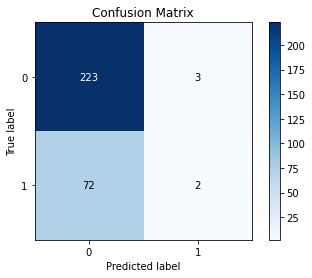

In [63]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, logistic_reg_pred);


#### Model Improvement

In [ ]:
parameter = {
    "penalty" : ['elasticnet', 'l2'],
    "fit_intercept" : [True, False],
    "C": [0.25, 0.5, 0.75, 1.0]
}

model_logistic_reg_pred = GridSearchCV(logistic_reg, parameter, cv=3, n_jobs=-1, verbose=1)
model_logistic_reg_pred.fit(X_train, y_train)

In [ ]:
model_logistic_reg_pred.best_params_

In [ ]:
# prediction
pred_result = model_logistic_reg_pred.predict(X_test)
pred_proba_result = model_logistic_reg_pred.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
# predict
pred_result = knn.predict(X_test)
pred_proba_result = knn.predict_proba(X_test)

In [82]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.7266666666666667

In [83]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.758993,0.318182,0.726667,0.538587,0.650259
recall,0.933628,0.094595,0.726667,0.514111,0.726667
f1-score,0.837302,0.145833,0.726667,0.491567,0.666739
support,226.000000,74.000000,0.726667,300.000000,300.000000


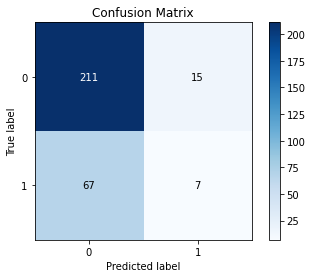

In [84]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


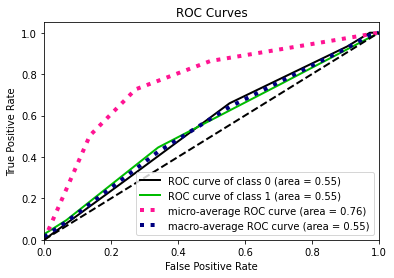

In [85]:
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

#### Model Improvement

In [86]:
parameter = {
    "n_neighbors" : range(2, 5, 1),
    "weights" : ['uniform', 'distance'],
    "p" : [1,2]
}

model = GridSearchCV(knn, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [87]:
model.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}

In [88]:
# predict
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

In [89]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.7633333333333333

In [90]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.770035,0.615385,0.763333,0.692710,0.731888
recall,0.977876,0.108108,0.763333,0.542992,0.763333
f1-score,0.861598,0.183908,0.763333,0.522753,0.694435
support,226.000000,74.000000,0.763333,300.000000,300.000000


Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


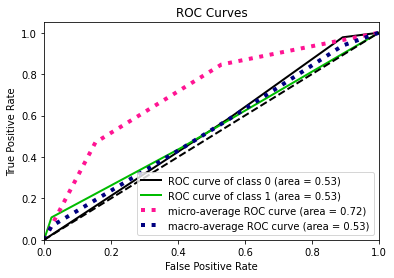

In [91]:
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

### Random Forest

In [73]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [74]:
# predict
pred_result = random_forest_clf.predict(X_test)
pred_proba_result = random_forest_clf.predict_proba(X_test)

In [75]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8066666666666666

In [76]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.892523,0.593023,0.806667,0.742773,0.818647
recall,0.845133,0.689189,0.806667,0.767161,0.806667
f1-score,0.868182,0.637500,0.806667,0.752841,0.811280
support,226.000000,74.000000,0.806667,300.000000,300.000000


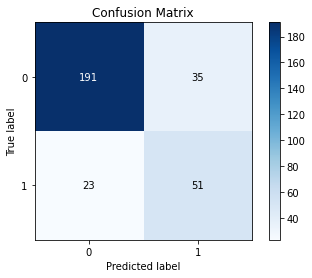

In [77]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


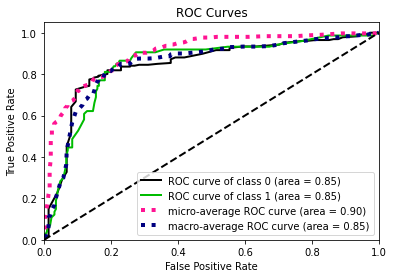

In [79]:
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

#### Model Improvement

In [92]:
parameter = {
    'n_estimators': [10, 50, 100, 1000],
    'max_depth': [3,5,10, None],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
    
 }

model = GridSearchCV(random_forest_clf, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 1000]},
             verbose=1)

In [93]:
model.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [94]:
# predict
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

In [95]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8166666666666667

In [96]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.890411,0.617284,0.816667,0.753847,0.823040
recall,0.862832,0.675676,0.816667,0.769254,0.816667
f1-score,0.876404,0.645161,0.816667,0.760783,0.819365
support,226.000000,74.000000,0.816667,300.000000,300.000000


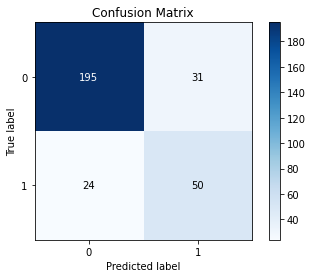

In [97]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


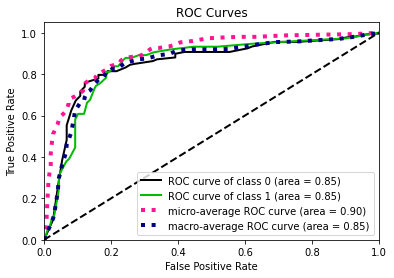

In [98]:
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [126]:
# define random forest model
random_forest_clf_best = RandomForestClassifier(
    random_state = 1000,
    criterion = 'gini',
    max_depth = None,
    max_features = 'sqrt',
    n_estimators = 50
)
# fit model to training data
random_forest_clf_best.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=1000)

### XGBoost

In [99]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=1000)

In [100]:
# predict
pred_result = xgb_clf.predict(X_test)
pred_proba_result = xgb_clf.predict_proba(X_test)

In [101]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8166666666666667

In [102]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.886878,0.620253,0.816667,0.753565,0.821110
recall,0.867257,0.662162,0.816667,0.764709,0.816667
f1-score,0.876957,0.640523,0.816667,0.758740,0.818637
support,226.000000,74.000000,0.816667,300.000000,300.000000


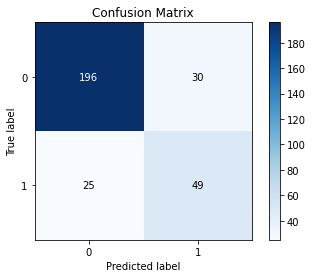

In [103]:
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


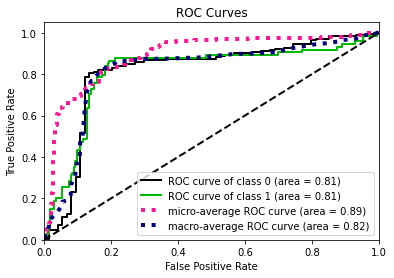

In [104]:
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

#### Model Improvement


In [105]:
parameter = {
    'n_estimators' : [10, 50, 100],
    'max_depth' : [3,5,10,None],
    'learning_rate' : [0.1, 0.05, 0.01],
    'grow_policy' : ['depthwise', 'lossguide']

}

model = GridSearchCV(xgb_clf, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits



54 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.7/dist-packages

GridSearchCV(cv=3, estimator=XGBClassifier(random_state=1000), n_jobs=-1,
             param_grid={'grow_policy': ['depthwise', 'lossguide'],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [106]:
model.best_params_

{'grow_policy': 'depthwise',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}

In [107]:
# predict
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

In [108]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8166666666666667

In [109]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Fraud','Fraud'], output_dict=True))

,not Fraud,Fraud,accuracy,macro avg,weighted avg
precision,0.886878,0.620253,0.816667,0.753565,0.821110
recall,0.867257,0.662162,0.816667,0.764709,0.816667
f1-score,0.876957,0.640523,0.816667,0.758740,0.818637
support,226.000000,74.000000,0.816667,300.000000,300.000000


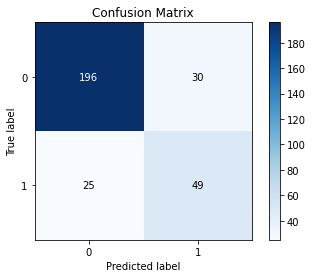

In [110]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


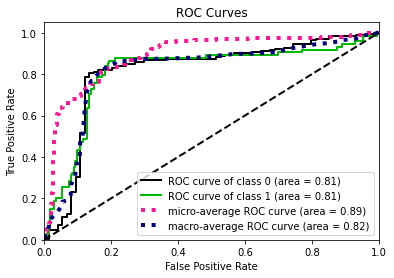

In [111]:
# xgboost result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

## Model Agnostic Methods

In [127]:
fraud_random_forest_clf_best = dx.Explainer(random_forest_clf_best, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 700 rows 20 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f149210fb00> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.25, max = 0.98
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.4, mean = -0.00289, max = 0.46
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [128]:
# visualize permutation feature importance for Random model
fraud_random_forest_clf_best.model_parts().plot()

In [131]:
# visualize permutation feature importance for RandomForest model
fraud_random_forest_clf_best.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 20/20 [00:06<00:00,  3.19it/s]


### Rekomendasi
Berdasarkan Interpretasi pada model terbaik saya maka di rekomendasikan
- semakin besar tingkah keparahan, maka akan mendekati Fraud
- semakin banyak klaim untuk kerusakan mobil, maka akan mendekati Fraud
- semakin banyak total klaim, maka akan mendekati fraud
- semakin banyak klaim untuk kerusakan properti, maka akan mendekati fraud
- semakin banyak klaim untuk luka-luka, maka akan mendekati fraud